In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Mini_Project/review_aplikasi_belajar_preprocessed_FINAL.csv' # Corrected file path
df = pd.read_csv(file_path)

print("Data loaded successfully. First 5 rows:")
df.head()

Data loaded successfully. First 5 rows:


app                                             review  rating  \
0  Ruangguru  kenapa ya selalu update setiap mau masuk ke ha...       1   
1  Ruangguru                                            bagussd       5   
2  Ruangguru  banyak bug!!!,kalau buka aplikasi sering terke...       1   
3  Ruangguru                                 wahhh sangat 🅑🅐🅖🅤🅢       4   
4  Ruangguru                                               good       5   

                                          clean_text  \
0  kenapa ya selalu update setiap mau masuk ke ha...   
1                                            bagussd   
2  banyak bug kalau buka aplikasi sering terkelua...   
3                                       wahhh sangat   
4                                               good   

                                              tokens  \
0  ['kenapa', 'ya', 'selalu', 'update', 'setiap',...   
1                                        ['bagussd']   
2  ['banyak', 'bug', 'kalau', 'buka', 'aplikasi',...   
3                                ['wahhh', 'sangat']   
4                                           ['good']   

                                        tokens_clean  \
0  ['update', 'masuk', 'halam', 'mana', 'masuk', ...   
1                                                 []   
2                                   ['buka', 'luar']   
3                                                 []   
4                                                 []   

                                          final_text  
0  update masuk halam mana masuk update dril upda...  
1                                             bagusd  
2                                          buka luar  
3                                                NaN  
4                                                NaN

## Persiapan Pelabelan

Periksa struktur data dan kolom yang relevan untuk proses pelabelan.


In [ ]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics for 'rating' column:")
print(df['rating'].describe())

print("\nValue Counts for 'rating' column:")
print(df['rating'].value_counts())

print("\nSample of 'final_text' and 'rating' columns:")
print(df[['final_text', 'rating']].head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app           5294 non-null   object
 1   review        5294 non-null   object
 2   rating        5294 non-null   int64 
 3   clean_text    5226 non-null   object
 4   tokens        5294 non-null   object
 5   tokens_clean  5294 non-null   object
 6   final_text    5002 non-null   object
dtypes: int64(1), object(6)
memory usage: 289.6+ KB

Descriptive Statistics for 'rating' column:
count    5294.000000
mean        3.762372
std         1.638099
min         1.000000
25%         2.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

Value Counts for 'rating' column:
rating
5    3050
1    1082
4     426
3     410
2     326
Name: count, dtype: int64

Sample of 'final_text' and 'rating' columns:
                                          

## PELABELAN AWAL (STAR-BASED)

In [ ]:
def label_star_based(rating):
    if rating in [1, 2]:
        return 'negatif'
    elif rating == 3:
        return 'netral'
    elif rating in [4, 5]:
        return 'positif'
    else:
        return None

df['label_star'] = df['rating'].apply(label_star_based)

## KAMUS LEXICON (VALIDASI)

Load Kamus InSet (positive & negative) darii https://github.com/fajri91/InSet

In [ ]:
# Load kamus InSet
positive_lexicon = pd.read_csv(
    '/content/drive/MyDrive/Mini_Project/positive.tsv',
    sep='\t',
    header=None
)

negative_lexicon = pd.read_csv(
    '/content/drive/MyDrive/Mini_Project/negative.tsv',
    sep='\t',
    header=None
)

# Ubah ke SET agar pencarian cepat
positive_words = set(positive_lexicon[0].str.strip())
negative_words = set(negative_lexicon[0].str.strip())

print("Jumlah kata positif:", len(positive_words))
print("Jumlah kata negatif:", len(negative_words))

Jumlah kata positif: 3610
Jumlah kata negatif: 6608


## HITUNG SKOR LEXICON

In [ ]:
def lexicon_score(text):
    words = text.split()
    pos = sum(1 for w in words if w in positive_words)
    neg = sum(1 for w in words if w in negative_words)
    return pos, neg

In [ ]:
df[['pos_score','neg_score']] = df['review'].apply(
    lambda x: pd.Series(lexicon_score(x))
)

## Penanganan Missing Value

In [ ]:
print("Missing final_text sebelum: ", df['final_text'].isnull().sum())
df['final_text'] = df['final_text'].fillna('')
print("Missing final_text sesudah fillna: ", df['final_text'].isnull().sum())

# Remove rows where 'final_text' is an empty string
initial_rows = len(df)
df = df[df['final_text'] != ''].copy()
print(f"Jumlah baris setelah menghapus 'final_text' kosong: {len(df)} (Dihapus: {initial_rows - len(df)} baris)")

Missing final_text sebelum:  292
Missing final_text sesudah fillna:  0
Jumlah baris setelah menghapus 'final_text' kosong: 5002 (Dihapus: 292 baris)


## LABEL HASIL LEXICON

In [ ]:
df[['pos_score', 'neg_score']] = df['final_text'].apply(
    lambda x: pd.Series(lexicon_score(x))
)

def label_lexicon(pos, neg):
    if pos > neg:
        return 'positif'
    elif neg > pos:
        return 'negatif'
    else:
        return 'netral'

df['label_lexicon'] = df.apply(
    lambda x: label_lexicon(x['pos_score'], x['neg_score']),
    axis=1
)

## Terapkan ke Data

In [ ]:
df['sentiment'] = df.apply(lambda x: label_lexicon(x['pos_score'], x['neg_score']), axis=1)

df[['final_text', 'sentiment']].head()

final_text sentiment
0  update masuk halam mana masuk update dril upda...   negatif
1                                             bagusd    netral
2                                          buka luar    netral
5                                              bantu    netral
6                                              jelek   negatif

## VALIDASI & HAPUS DATA ANOMALI

In [ ]:
df_valid = df[df['label_star'] == df['label_lexicon']].copy()
df_invalid = df[df['label_star'] != df['label_lexicon']].copy()

## HASIL AKHIR

In [ ]:
print("Total data awal :", len(df))
print("Data valid      :", len(df_valid))
print("Data tidak valid:", len(df_invalid))

Total data awal : 5002
Data valid      : 1751
Data tidak valid: 3251


## Distribusi Sentimen

label_lexicon
netral     2447
positif    1410
negatif    1145
Name: count, dtype: int64


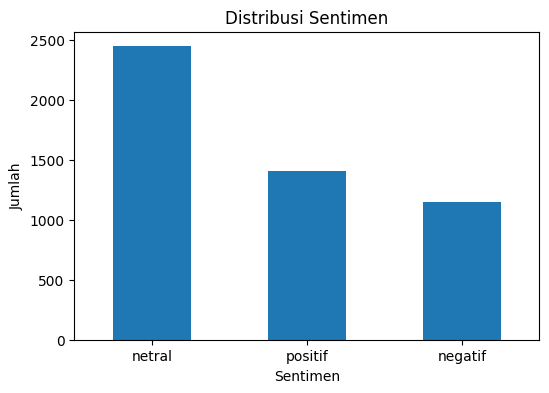

In [ ]:
sentiment_dist = df['label_lexicon'].value_counts()
print(sentiment_dist)

plt.figure(figsize=(6,4))
sentiment_dist.plot(kind='bar')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

## Distribusi Sentimen per Aplikasi

label_lexicon  negatif  netral  positif
app                                    
Pahamify           368     783      519
Quipper            459     788      440
Ruangguru          318     876      451

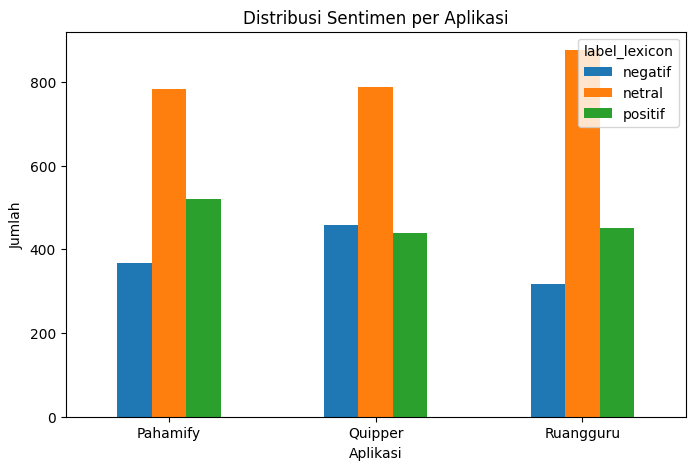

In [ ]:
sentiment_app = pd.crosstab(df['app'], df['label_lexicon'])
display(sentiment_app)

sentiment_app.plot(kind='bar', figsize=(8,5))
plt.title('Distribusi Sentimen per Aplikasi')
plt.xlabel('Aplikasi')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

## Analisis Kasus Tidak Valid

In [ ]:
df_invalid_pos_netral = df_invalid[
    (df_invalid['label_star'] == 'positif') &
    (df_invalid['label_lexicon'] == 'netral')
]

df_invalid_neg_netral = df_invalid[
    (df_invalid['label_star'] == 'negatif') &
    (df_invalid['label_lexicon'] == 'netral')
]

display(df_invalid_pos_netral.head())
display(df_invalid_neg_netral.head())

app                                             review  rating  \
1   Ruangguru                                            bagussd       5   
5   Ruangguru                                           ngebantu       5   
8   Ruangguru                                 adalahh pokok nyaa       5   
11  Ruangguru                                              hebat       5   
13  Ruangguru  saya sangat menyukainya walaupun berbayar saya...       5   

                                           clean_text  \
1                                             bagussd   
5                                            ngebantu   
8                                  adalahh pokok nyaa   
11                                              hebat   
13  saya sangat menyukainya walaupun berbayar saya...   

                                               tokens  \
1                                         ['bagussd']   
5                                        ['ngebantu']   
8                        ['adalahh', 'pokok', 'nyaa']   
11                                          ['hebat']   
13  ['saya', 'sangat', 'menyukainya', 'walaupun', ...   

                                         tokens_clean  \
1                                                  []   
5                                           ['bantu']   
8                                           ['pokok']   
11                                          ['hebat']   
13  ['suka', 'bayar', 'ajar', 'peringkat', 'ruangg...   

                             final_text label_star  pos_score  neg_score  \
1                                bagusd    positif          0          0   
5                                 bantu    positif          1          1   
8                                 pokok    positif          1          1   
11                                hebat    positif          0          0   
13  suka bayar ajar peringkat ruangguru    positif          3          3   

   label_lexicon sentiment  
1         netral    netral  
5         netral    netral  
8         netral    netral  
11        netral    netral  
13        netral    netral

app                                             review  rating  \
2   Ruangguru  banyak bug!!!,kalau buka aplikasi sering terke...       1   
10  Ruangguru  Aplikasi Ruangguru sering lemot dan sering buf...       2   
31  Ruangguru                                sulit untuk belahar       2   
33  Ruangguru                              suka nelfon" ga jelas       2   
44  Ruangguru  ini knp si app nya ga bisa dibuka, pas mau dib...       1   

                                           clean_text  \
2   banyak bug kalau buka aplikasi sering terkelua...   
10  aplikasi ruangguru sering lemot dan sering buf...   
31                                sulit untuk belahar   
33                               suka nelfon ga jelas   
44  ini knp si app nya ga bisa dibuka pas mau dibu...   

                                               tokens  \
2   ['banyak', 'bug', 'kalau', 'buka', 'aplikasi',...   
10  ['aplikasi', 'ruangguru', 'sering', 'lemot', '...   
31                      ['sulit', 'untuk', 'belahar']   
33                  ['suka', 'nelfon', 'ga', 'jelas']   
44  ['ini', 'knp', 'si', 'app', 'nya', 'ga', 'bisa...   

                                         tokens_clean  \
2                                    ['buka', 'luar']   
10  ['ruangguru', 'bufering', 'ajar', 'nyam', 'moh...   
31                                          ['sulit']   
33                                           ['suka']   
44  ['buka', 'muncul', 'layar', 'putih', 'mulu', '...   

                                      final_text label_star  pos_score  \
2                                      buka luar    negatif          1   
10       ruangguru bufering ajar nyam mohon baik    negatif          3   
31                                   sulit bahar    negatif          0   
33                                   suka nelfon    negatif          1   
44  buka muncul layar putih mulu langsung langan    negatif          4   

    neg_score label_lexicon sentiment  
2           1        netral    netral  
10          3        netral    netral  
31          0        netral    netral  
33          1        netral    netral  
44          4        netral    netral

## Visualisasi Label Valid

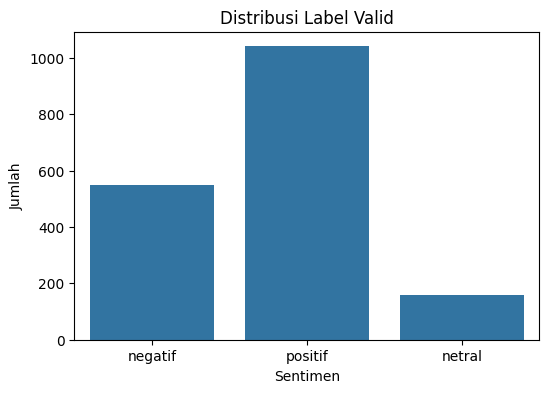

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_valid, x='label_star')
plt.title('Distribusi Label Valid')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

## DATA FINAL UNTUK ANALISIS LANJUT

In [ ]:
df_valid[['review','rating','label_star','app', 'final_text', 'sentiment']].to_csv(
    "/content/drive/MyDrive/Mini_Project/dataset_valid_final.csv", index=False
)

### WORDCLOUD PER SENTIMEN

## Import Library

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Pisahkan Data Berdasarkan Sentimen

In [ ]:
df_pos = df[df['sentiment'] == 'positif']
df_net = df[df['sentiment'] == 'netral']
df_neg = df[df['sentiment'] == 'negatif']

## Fungsi WordCloud (Reusable & Rapi)

In [ ]:
def generate_wordcloud(text_data, title, sentiment):
    text = ' '.join(text_data)

    # Mapping warna berdasarkan sentimen
    sentiment_colors = {
        'positif': 'Greens',
        'netral': 'Blues',
        'negatif': 'Reds'
    }

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=sentiment_colors.get(sentiment, 'gray'),
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)
    plt.show()


## WordCloud Sentimen Positif

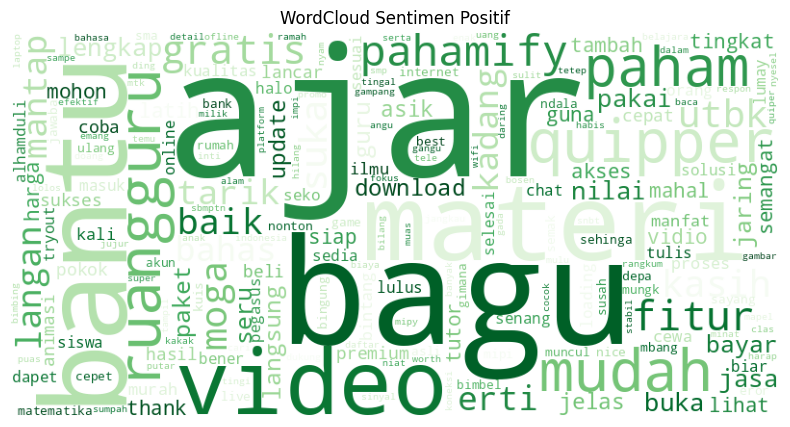

In [ ]:
generate_wordcloud(
    df_pos['final_text'],
    'WordCloud Sentimen Positif',
    'positif'
)

## WordCloud Sentimen Netral

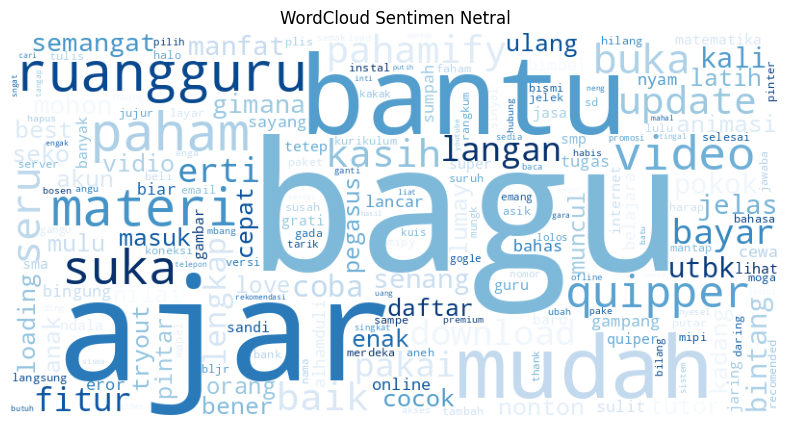

In [ ]:
generate_wordcloud(
    df_net['final_text'],
    'WordCloud Sentimen Netral',
    'netral'
)

## WordCloud Sentimen Negatif

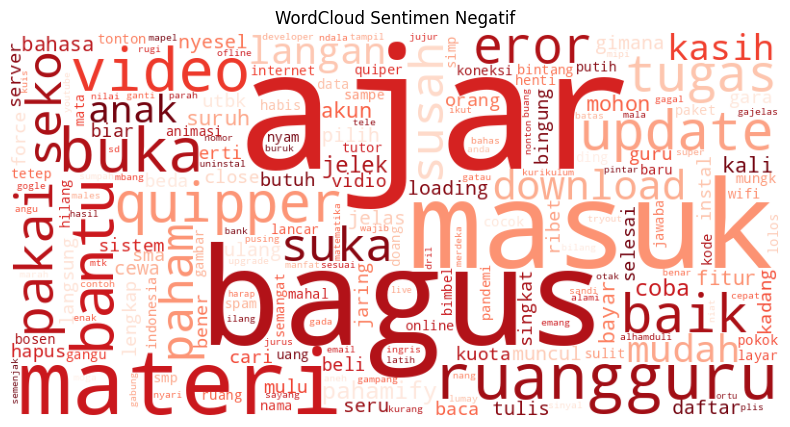

In [ ]:
generate_wordcloud(
    df_neg['final_text'],
    'WordCloud Sentimen Negatif',
    'negatif'
)

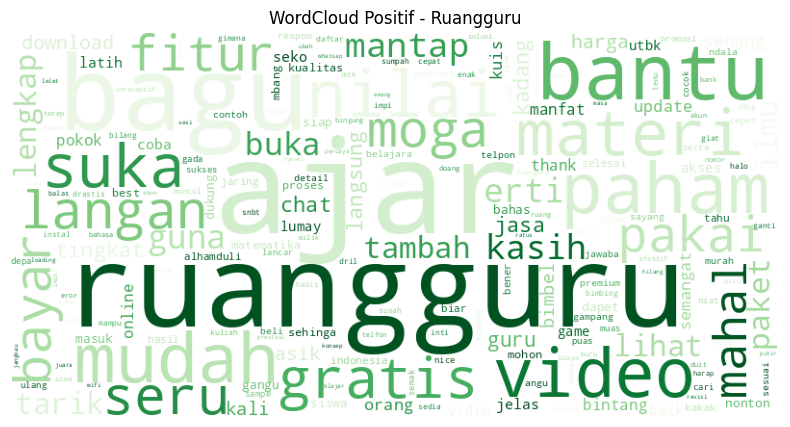

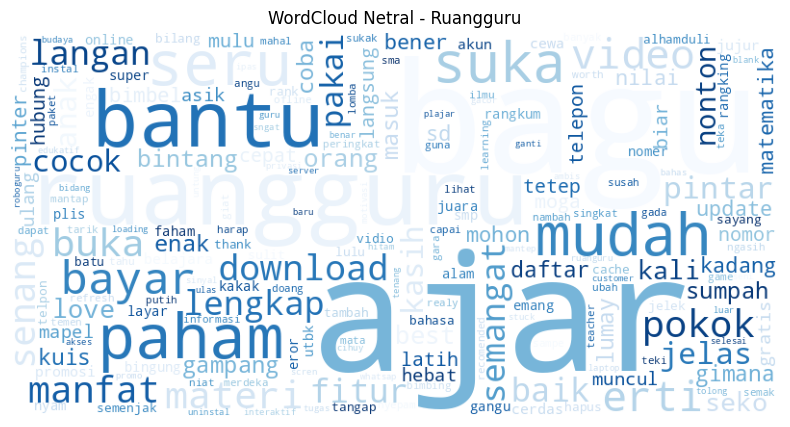

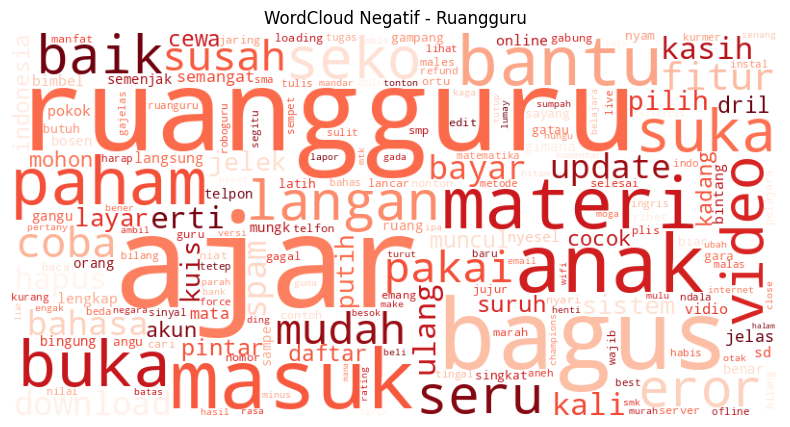

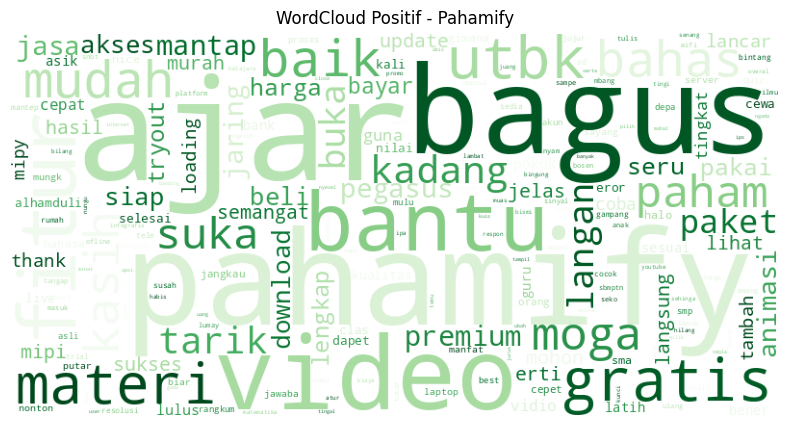

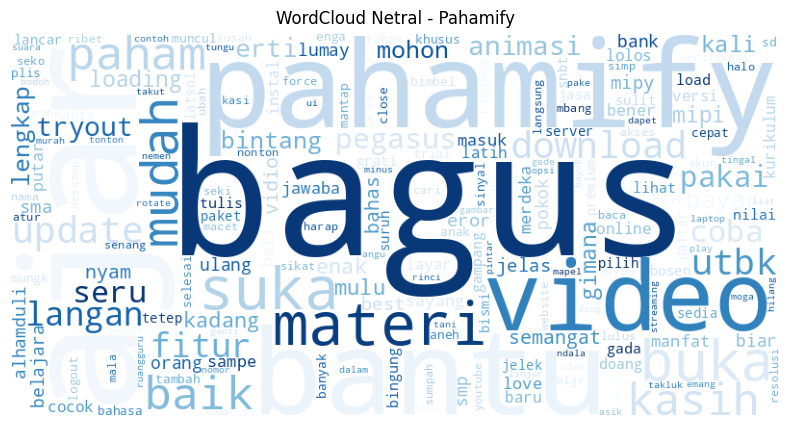

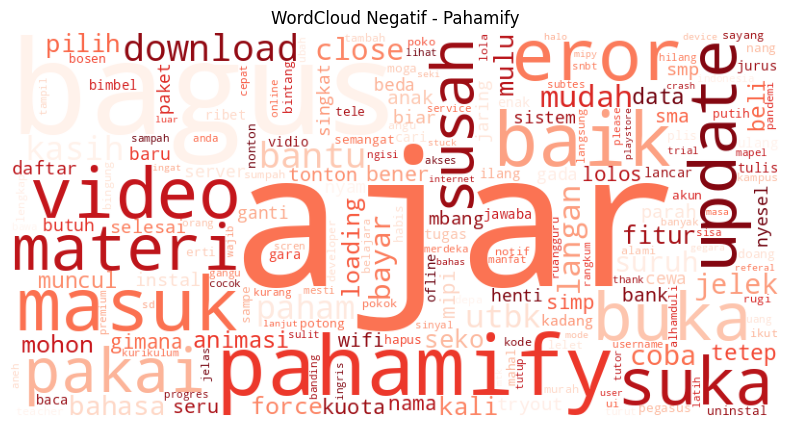

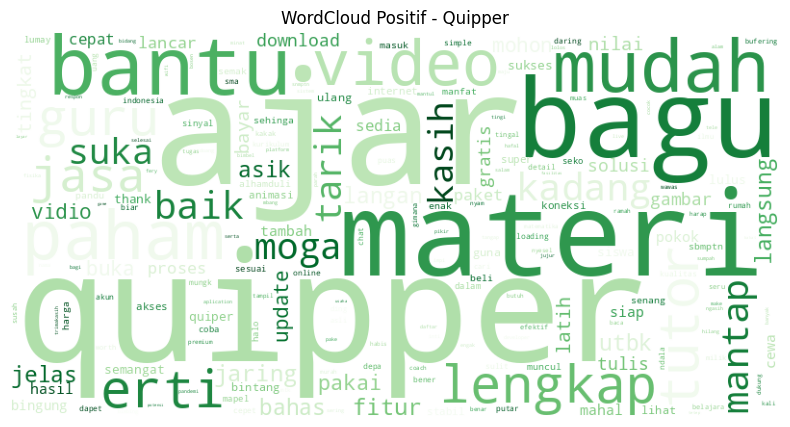

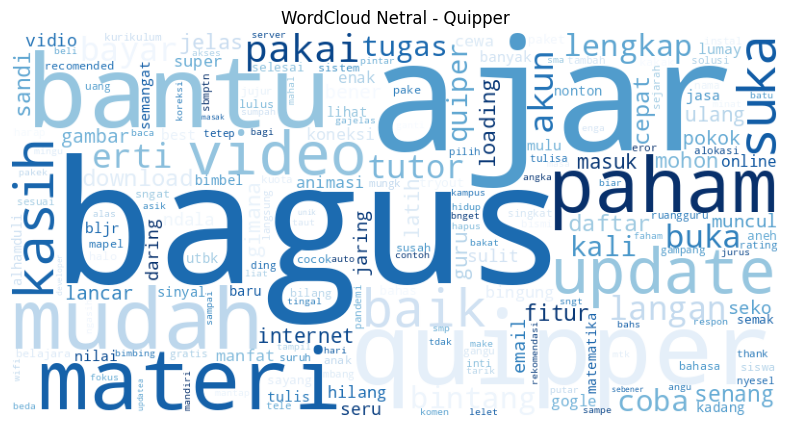

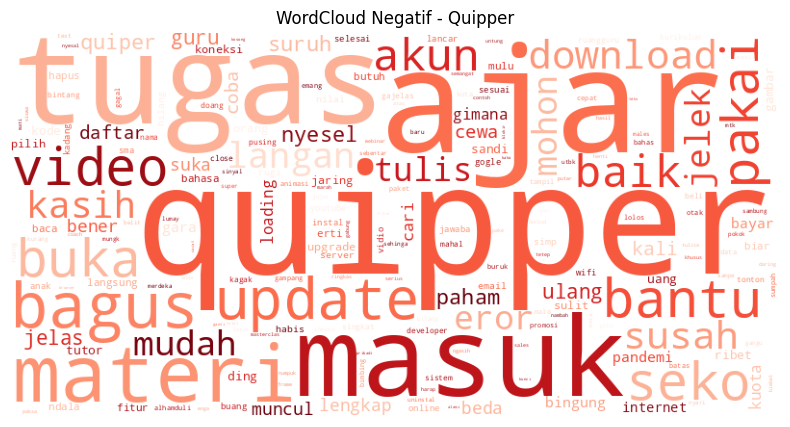

In [ ]:
sentiments = ['positif', 'netral', 'negatif']

for app_name in df['app'].unique():
    for sent in sentiments:
        subset = df[
            (df['app'] == app_name) &
            (df['sentiment'] == sent)
        ]

        if not subset['final_text'].empty:
            generate_wordcloud(
                subset['final_text'],
                f'WordCloud {sent.capitalize()} - {app_name}',
                sent
            )
        else:
            print(f"No data for WordCloud {sent.capitalize()} - {app_name}")


## VALIDASI CEPAT

In [ ]:
print("Positif :", len(df_pos))
print("Netral  :", len(df_net))
print("Negatif :", len(df_neg))

Positif : 1410
Netral  : 2447
Negatif : 1145


### BIGRAM PER SENTIMEN

## Import Library

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

## Pisahkan Data Berdasarkan Sentimen

In [ ]:
df_pos = df[df['sentiment'] == 'positif']
df_net = df[df['sentiment'] == 'netral']
df_neg = df[df['sentiment'] == 'negatif']

## Fungsi Universal N-Gram (1–5)

In [ ]:
def get_top_ngrams(text_series, ngram_n=2, top_n=15):
    vectorizer = CountVectorizer(
        ngram_range=(ngram_n, ngram_n),
        stop_words=None
    )

    X = vectorizer.fit_transform(text_series)
    sum_words = X.sum(axis=0)

    ngrams = [
        (word, sum_words[0, idx])
        for word, idx in vectorizer.vocabulary_.items()
    ]

    return pd.DataFrame(ngrams, columns=['Ngram', 'Frekuensi']) \
             .sort_values(by='Frekuensi', ascending=False) \
             .head(top_n)

## N-Gram Sentimen POSITIF (1–5)

In [ ]:
for n in range(1, 6):
    print(f"\n🔹 TOP {n}-GRAM SENTIMEN POSITIF")
    display(get_top_ngrams(df_pos['final_text'], ngram_n=n))


🔹 TOP 1-GRAM SENTIMEN POSITIF


Ngram  Frekuensi
5          ajar        621
29        bagus        397
56        bantu        248
67       materi        233
45        video        195
1424    quipper        190
35    ruangguru        186
57        mudah        182
60        paham        165
898    pahamify        153
202       fitur        138
40       gratis        130
119        suka        117
42         moga        110
87         utbk        108


🔹 TOP 2-GRAM SENTIMEN POSITIF


Ngram  Frekuensi
62       mudah paham         83
253       bantu ajar         57
67        mudah erti         47
104       video ajar         32
410     paham materi         31
1867       siap utbk         28
61        jasa mudah         28
268       bagus ajar         27
635       beli paket         26
664      proses ajar         25
88      jaring bagus         24
720   materi lengkap         21
5398   quipper bantu         21
1030   semangat ajar         20
663     bantu proses         20


🔹 TOP 3-GRAM SENTIMEN POSITIF


Ngram  Frekuensi
611      bantu proses ajar         16
53        jasa mudah paham         14
57         jasa mudah erti         13
2066       bantu siap utbk          9
3543        ajar siap utbk          7
1978    mudah paham materi          7
2132    materi mudah paham          7
1207       ajar mudah erti          7
2160     tarik mudah paham          7
1824       bantu ajar siap          6
78    loading jaring bagus          6
973      bagus mudah paham          6
5988    quipper bantu ajar          6
368     bantu paham materi          6
5101     paham materi ajar          6


🔹 TOP 4-GRAM SENTIMEN POSITIF


Ngram  Frekuensi
3607             bantu ajar siap utbk          4
45              ajar jasa mudah paham          3
47              bagus jasa mudah erti          3
6188           fitur tarik video ajar          3
3521            bagus bantu siap utbk          3
1329         lengkap jasa mudah paham          3
1485           bagus bantu paham ajar          2
2463        nyesel beli paket premium          2
1498            bantu ajar jasa mudah          2
7684         nama pandu ajar download          2
6190            video ajar mudah erti          2
6189           tarik video ajar mudah          2
7136  sumary material this aplication          2
1328        materi lengkap jasa mudah          2
5018            ajar tarik mudah erti          2


🔹 TOP 5-GRAM SENTIMEN POSITIF


Ngram  Frekuensi
5373       fitur tarik video ajar mudah          2
5374        tarik video ajar mudah erti          2
1274      bagus bantu paham ajar detail          2
1146    materi lengkap jasa mudah paham          2
4524     kanjeng ratu cewa cewa quipper          1
4523        ratu kanjeng ratu cewa cewa          1
4522     kanjeng ratu kanjeng ratu cewa          1
4521   sesuai kanjeng ratu kanjeng ratu          1
4520  parah sesuai kanjeng ratu kanjeng          1
4519    kacau parah sesuai kanjeng ratu          1
4518   rusak kacau parah sesuai kanjeng          1
4517     dapet rusak kacau parah sesuai          1
4516      masak dapet rusak kacau parah          1
4515       njir masak dapet rusak kacau          1
4525    ulang pakai quipper tulis akses          1

## N-Gram Sentimen NETRAL (1–5)

In [ ]:
for n in range(1, 6):
    print(f"\n🔹 TOP {n}-GRAM SENTIMEN NETRAL")
    display(get_top_ngrams(df_net['final_text'], ngram_n=n))


🔹 TOP 1-GRAM SENTIMEN NETRAL


Ngram  Frekuensi
15        bagus        689
7          ajar        673
3         bantu        357
35        mudah        203
5     ruangguru        200
19        paham        194
42       materi        187
12         suka        161
55        video        153
1354    quipper        135
34         seru        110
1          buka        109
10         baik         99
60       update         97
57        kasih         97


🔹 TOP 2-GRAM SENTIMEN NETRAL


Ngram  Frekuensi
112      bantu ajar        121
34      mudah paham         97
46       bagus ajar         64
243     bagus bantu         38
38       mudah erti         34
24   ajar ruangguru         32
446    paham materi         31
549   kasih bintang         28
157   semangat ajar         26
28       mudah ajar         25
339      ajar mudah         24
238       seru ajar         23
265     bagus mudah         22
256     ajar materi         22
37     materi mudah         21


🔹 TOP 3-GRAM SENTIMEN NETRAL


Ngram  Frekuensi
209     materi mudah paham         16
784     bantu paham materi         11
364       bagus bantu ajar         11
704       ajar mudah paham         10
578      bagus mudah paham          8
388       mudah paham ajar          7
194    seru ajar ruangguru          6
207      bantu ajar materi          6
543      jelas mudah paham          6
180  senang ajar ruangguru          6
374     mudah paham materi          6
755       bagus mudah ajar          5
697       bantu ajar mudah          5
929       seru mudah paham          5
24      bagus materi mudah          5


🔹 TOP 4-GRAM SENTIMEN NETRAL


Ngram  Frekuensi
1015     mudah paham ajar senang          3
1318       orang suka orang suka          3
155      bantu ajar materi mudah          3
156      ajar materi mudah paham          3
1319       suka orang suka orang          3
3242    bantu materi mudah paham          3
1952      bagus kadang suka eror          2
17       buka muncul layar putih          2
15       bagus materi mudah erti          2
314   materi lengkap mudah paham          2
602      suka bantu paham materi          2
545       bantu ajar mudah paham          2
2462      video ajar mudah paham          2
2545    bagus bantu paham materi          2
2681    materi mudah paham tutor          2


🔹 TOP 5-GRAM SENTIMEN NETRAL


Ngram  Frekuensi
1013             orang suka orang suka orang          3
112            bantu ajar materi mudah paham          3
1014              suka orang suka orang suka          2
2173          gede biar download please baik          1
2174       quipper gajelas mati layar curiga          1
2175          gajelas mati layar curiga coba          1
2176           mati layar curiga coba contek          1
2177         layar curiga coba contek hilang          1
2178         curiga coba contek hilang fitur          1
2179    sedih quipper video akses individual          1
2180    quipper video akses individual bantu          1
2181      video akses individual bantu modul          1
2182    akses individual bantu modul lengkap          1
2183  individual bantu modul lengkap quipper          1
2184    bantu modul lengkap quipper comeback          1

## N-Gram Sentimen NEGATIF (1–5)

In [ ]:
for n in range(1, 6):
    print(f"\n🔹 TOP {n}-GRAM SENTIMEN NEGATIF")
    display(get_top_ngrams(df_neg['final_text'], ngram_n=n))


🔹 TOP 1-GRAM SENTIMEN NEGATIF


Ngram  Frekuensi
26        ajar        359
22       bagus        224
1        masuk        180
100     materi        147
21   ruangguru        138
95        buka        125
64       video        123
167      bantu        120
941    quipper        118
0       update        114
12        baik        111
75       pakai        105
29       tugas        101
41        eror         99
31        seko         93


🔹 TOP 2-GRAM SENTIMEN NEGATIF


Ngram  Frekuensi
291       bantu ajar         31
316      mudah paham         29
848      force close         21
195   ajar ruangguru         17
153       bagus ajar         17
832       mohon baik         16
194       bagus anak         15
2234    suruh update         14
697        mata ajar         14
382     paham materi         13
32         suka ajar         13
218    kasih bintang         13
482       video ajar         12
498    semangat ajar         12
383      materi ajar         12


🔹 TOP 3-GRAM SENTIMEN NEGATIF


Ngram  Frekuensi
815               bantu anak ajar          5
795              suka force close          4
1202           bahasa mudah paham          4
3264          update suruh update          4
1122  matematika bahasa indonesia          3
533                anak suka ajar          3
460              cari materi ajar          3
2318             force close mulu          3
2702        video download tonton          3
1193           bantu paham materi          3
350             paham materi ajar          3
1261            mudah paham fitur          3
3440           materi mudah paham          3
2096          service eror ofline          3
4280             masuk akun sandi          3


🔹 TOP 4-GRAM SENTIMEN NEGATIF


Ngram  Frekuensi
1042           bantu paham materi ajar          2
4643       warna putih brightnes tingi          2
2361      video download tonton ofline          2
2398          video bahasa mudah paham          2
2657           loading pakai wifi data          2
979   ajar matematika bahasa indonesia          2
3006          materi mudah paham fitur          2
3874             pakai sesal nang uang          1
3872           sumpah prnh pakai sesal          1
3871            uang sumpah prnh pakai          1
3870            susah uang sumpah prnh          1
3869           pakai susah uang sumpah          1
3868             prnh pakai susah uang          1
3867            sesal prnh pakai susah          1
3866            paket sesal prnh pakai          1


🔹 TOP 5-GRAM SENTIMEN NEGATIF


Ngram  Frekuensi
4961     indo persis bingung baik kasih          1
0         update masuk halam mana masuk          1
4945    vidio mana uang transfer sumpah          1
4944     akses vidio mana uang transfer          1
4943        kasih akses vidio mana uang          1
4942        korb kasih akses vidio mana          1
4941        tipu korb kasih akses vidio          1
4940       daftar tipu korb kasih akses          1
4939      potong daftar tipu korb kasih          1
4938      kasih potong daftar tipu korb          1
4937      seko kasih potong daftar tipu          1
4936   promosi seko kasih potong daftar          1
4935  quipper promosi seko kasih potong          1
4934   orang quipper promosi seko kasih          1
4933   ingat orang quipper promosi seko          1

## VISUALISASI N-GRAM

In [ ]:
def get_top_ngrams(text_series, ngram_n=1, top_n=10):
    vectorizer = CountVectorizer(
        ngram_range=(ngram_n, ngram_n),
        stop_words=None
    )

    X = vectorizer.fit_transform(text_series)
    sum_words = X.sum(axis=0)

    ngrams = [
        (word, sum_words[0, idx])
        for word, idx in vectorizer.vocabulary_.items()
    ]

    return pd.DataFrame(ngrams, columns=['Ngram', 'Frekuensi']) \
             .sort_values(by='Frekuensi', ascending=False) \
             .head(top_n)

In [ ]:
def plot_ngram(df_ngram, title):
    plt.figure()
    plt.barh(df_ngram['Ngram'], df_ngram['Frekuensi'])
    plt.xlabel('Frekuensi')
    plt.ylabel('N-Gram')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

## UNIGRAM (1-Gram)

Positif

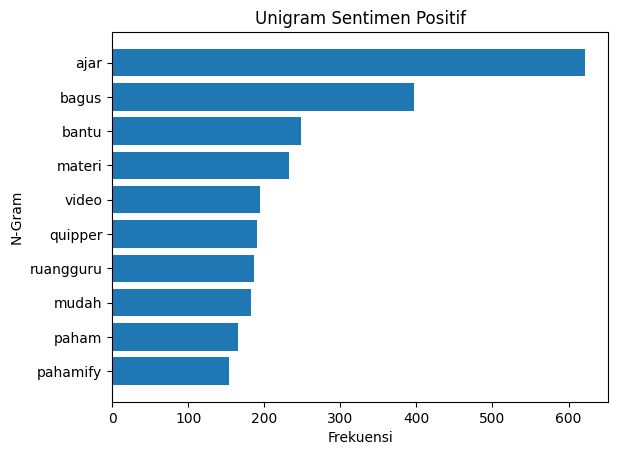

In [ ]:
uni_pos = get_top_ngrams(df_pos['final_text'], 1)
plot_ngram(uni_pos, 'Unigram Sentimen Positif')

Netral

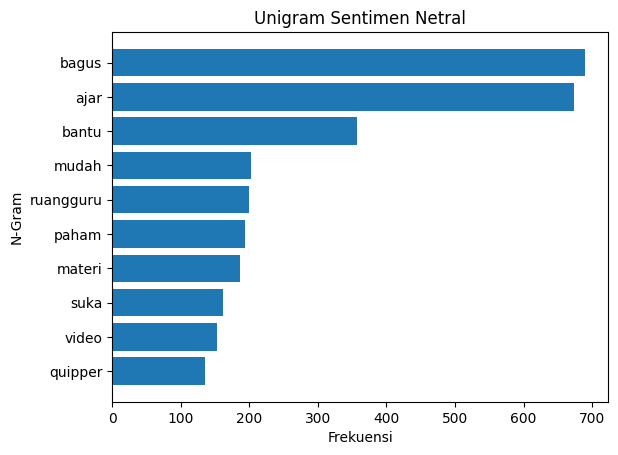

In [ ]:
uni_net = get_top_ngrams(df_net['final_text'], 1)
plot_ngram(uni_net, 'Unigram Sentimen Netral')

Negatif

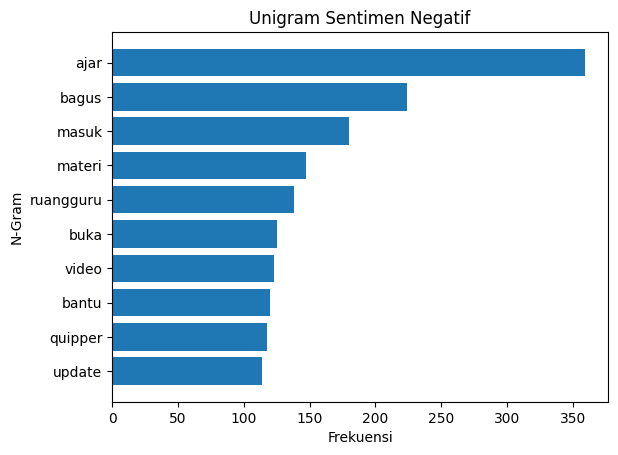

In [ ]:
uni_neg = get_top_ngrams(df_neg['final_text'], 1)
plot_ngram(uni_neg, 'Unigram Sentimen Negatif')

## BIGRAM (2-Gram)

Positif

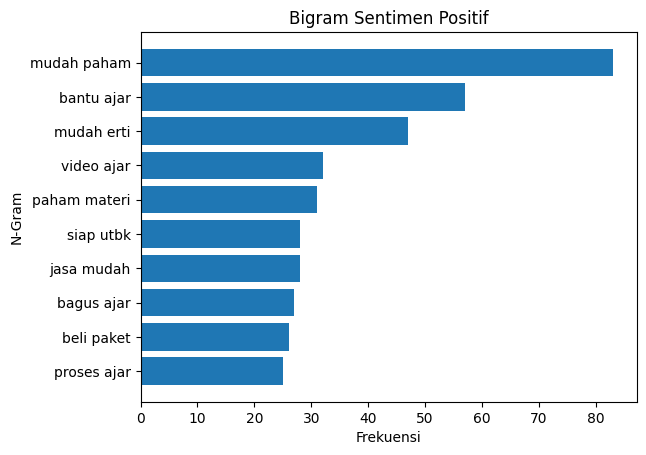

In [ ]:
bi_pos = get_top_ngrams(df_pos['final_text'], 2)
plot_ngram(bi_pos, 'Bigram Sentimen Positif')

Netral

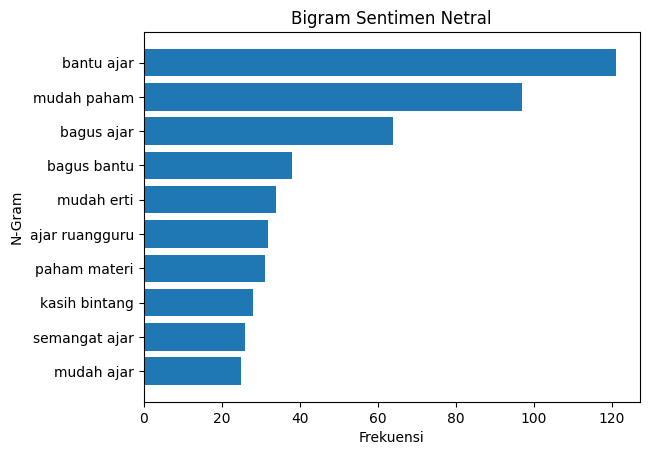

In [ ]:
bi_net = get_top_ngrams(df_net['final_text'], 2)
plot_ngram(bi_net, 'Bigram Sentimen Netral')

Negatif

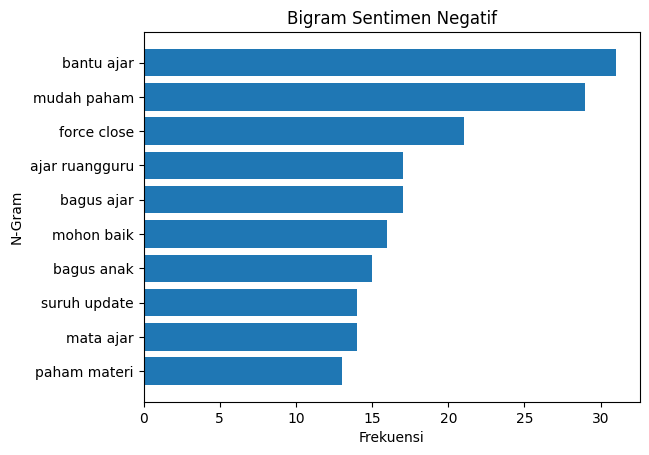

In [ ]:
bi_neg = get_top_ngrams(df_neg['final_text'], 2)
plot_ngram(bi_neg, 'Bigram Sentimen Negatif')

## TRIGRAM (3-Gram)

Positif

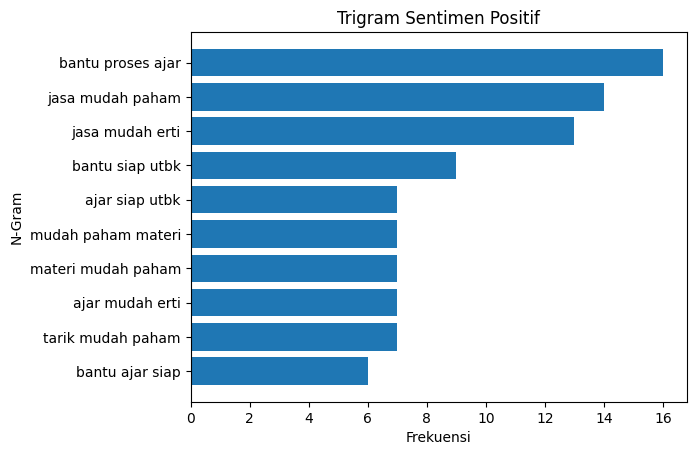

In [ ]:
tri_pos = get_top_ngrams(df_pos['final_text'], 3)
plot_ngram(tri_pos, 'Trigram Sentimen Positif')

Netral

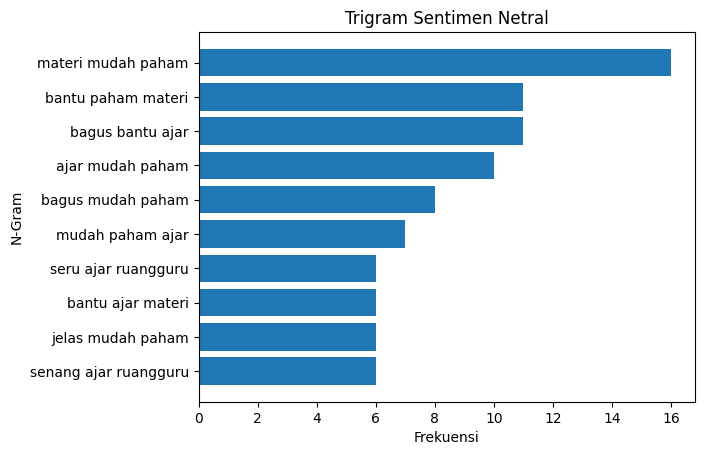

In [ ]:
tri_net = get_top_ngrams(df_net['final_text'], 3)
plot_ngram(tri_net, 'Trigram Sentimen Netral')

Negatif

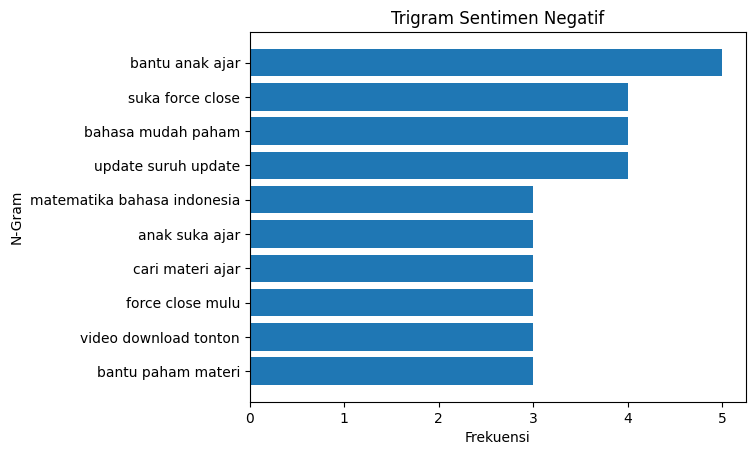

In [ ]:
tri_neg = get_top_ngrams(df_neg['final_text'], 3)
plot_ngram(tri_neg, 'Trigram Sentimen Negatif')

## 4-GRAM

Positif

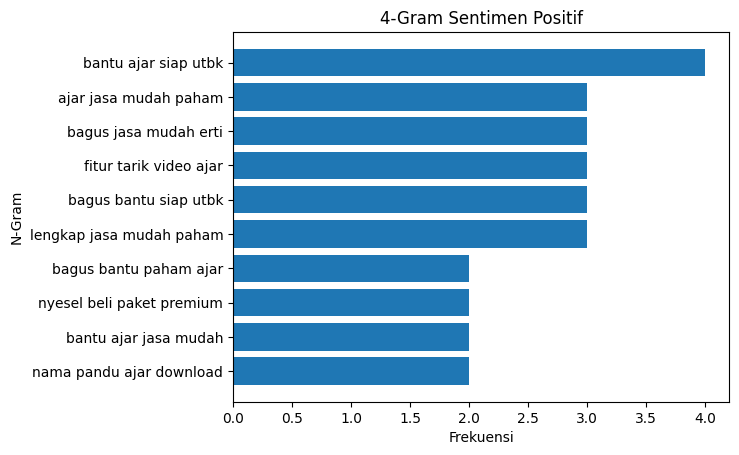

In [ ]:
four_pos = get_top_ngrams(df_pos['final_text'], 4)
plot_ngram(four_pos, '4-Gram Sentimen Positif')

Netral

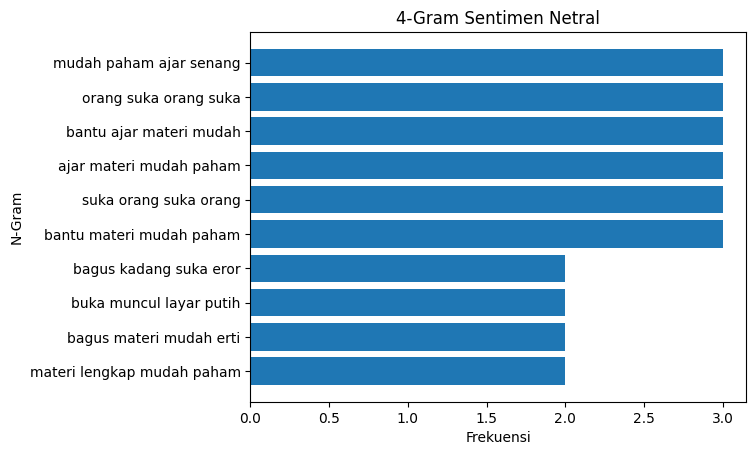

In [ ]:
four_net = get_top_ngrams(df_net['final_text'], 4)
plot_ngram(four_net, '4-Gram Sentimen Netral')

Negatif

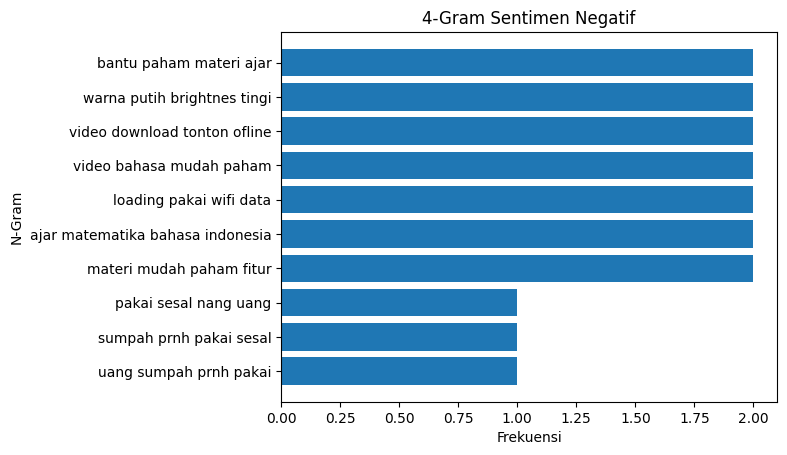

In [ ]:
four_neg = get_top_ngrams(df_neg['final_text'], 4)
plot_ngram(four_neg, '4-Gram Sentimen Negatif')

## 5-GRAM

Positif

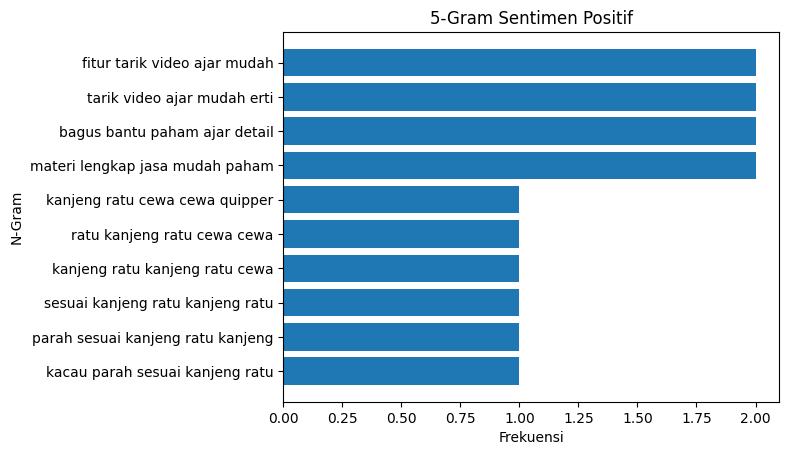

In [ ]:
five_pos = get_top_ngrams(df_pos['final_text'], 5)
plot_ngram(five_pos, '5-Gram Sentimen Positif')

Netral

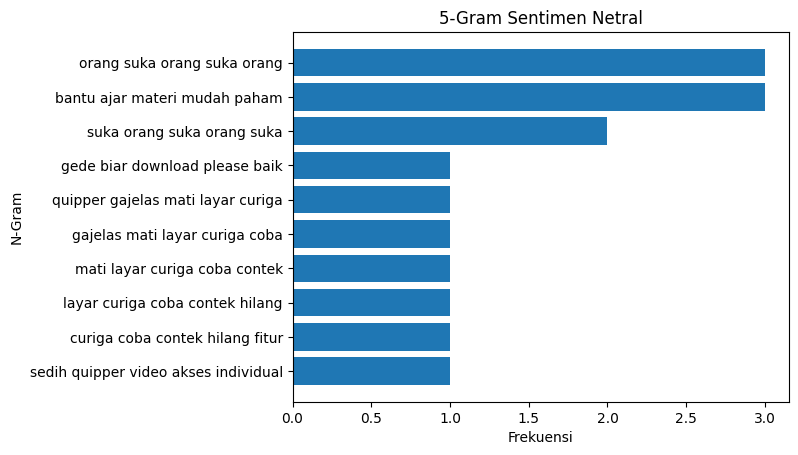

In [ ]:
five_net = get_top_ngrams(df_net['final_text'], 5)
plot_ngram(five_net, '5-Gram Sentimen Netral')

Negatif

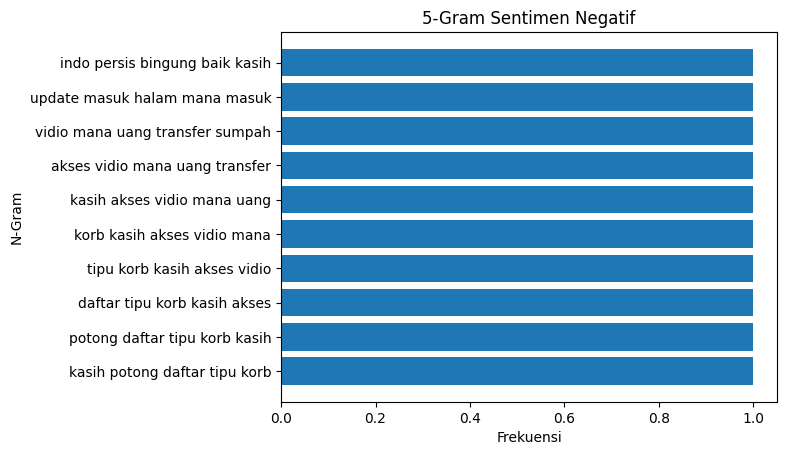

In [ ]:
five_neg = get_top_ngrams(df_neg['final_text'], 5)
plot_ngram(five_neg, '5-Gram Sentimen Negatif')

### N-GRAM (1–5) PER APLIKASI


--- VISUALIZING N-GRAMS FOR APPLICATION: RUANGGURU ---


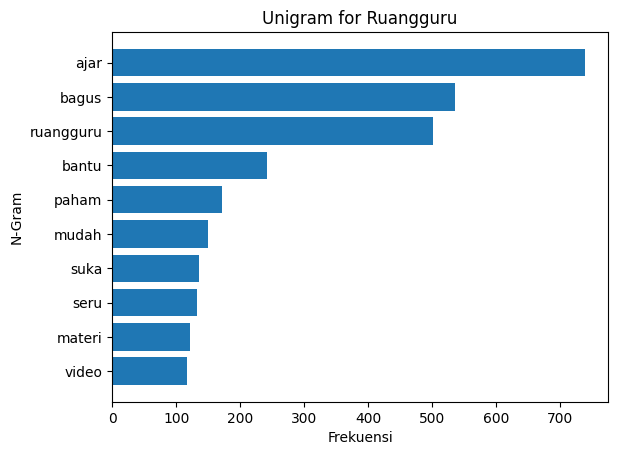

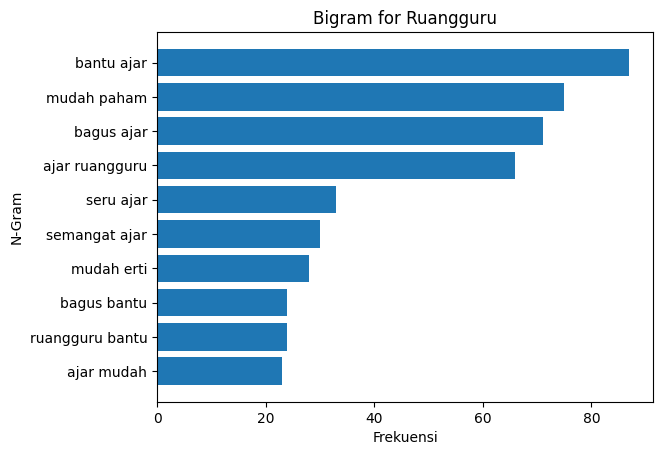

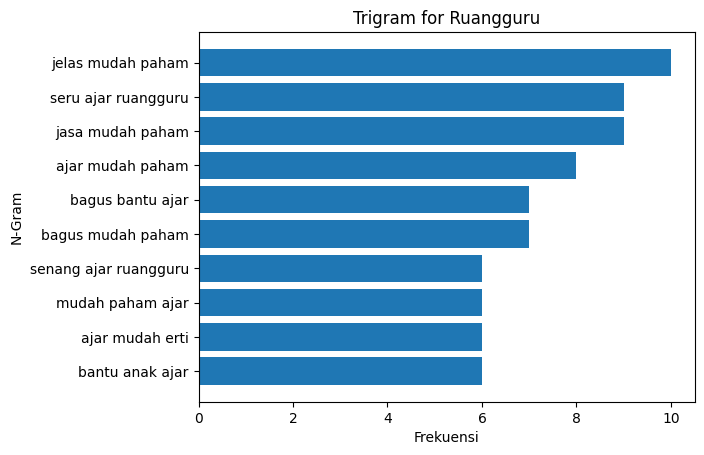

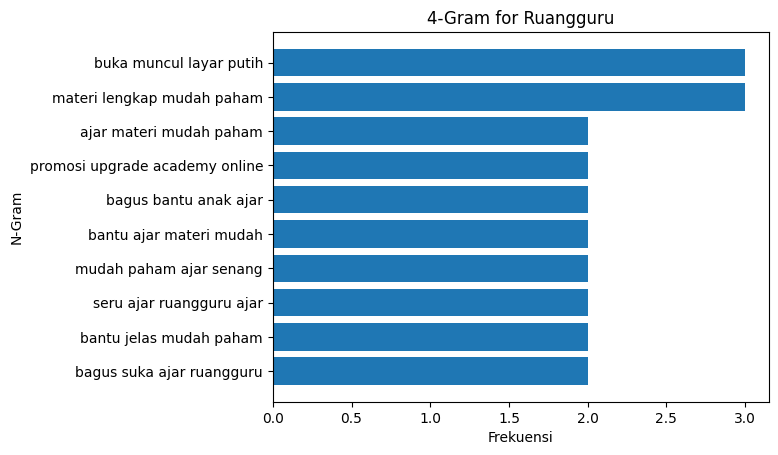

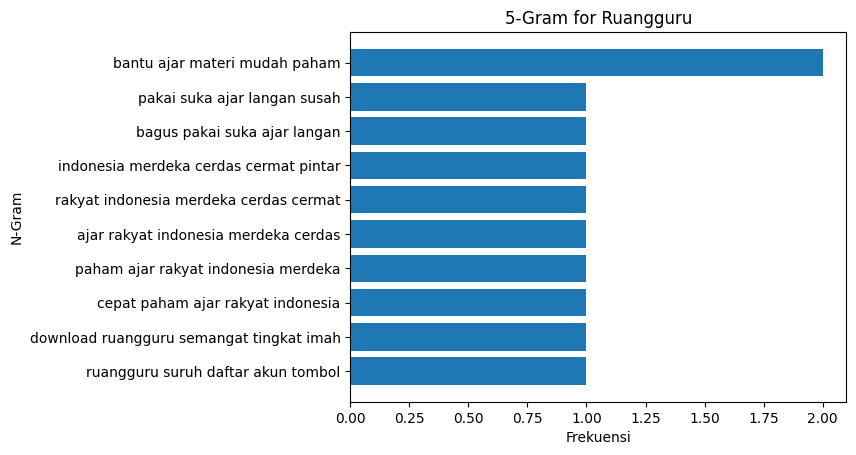


--- VISUALIZING N-GRAMS FOR APPLICATION: PAHAMIFY ---


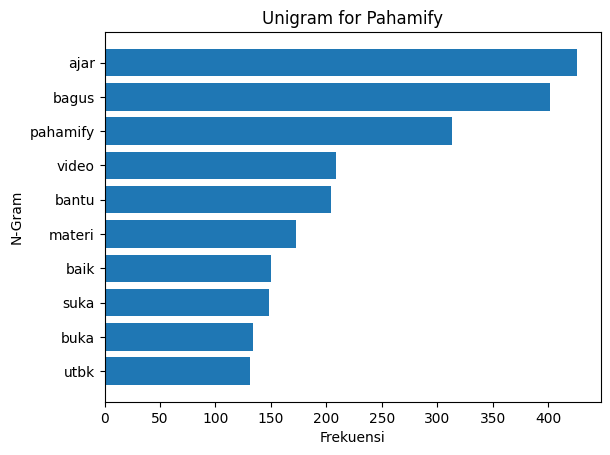

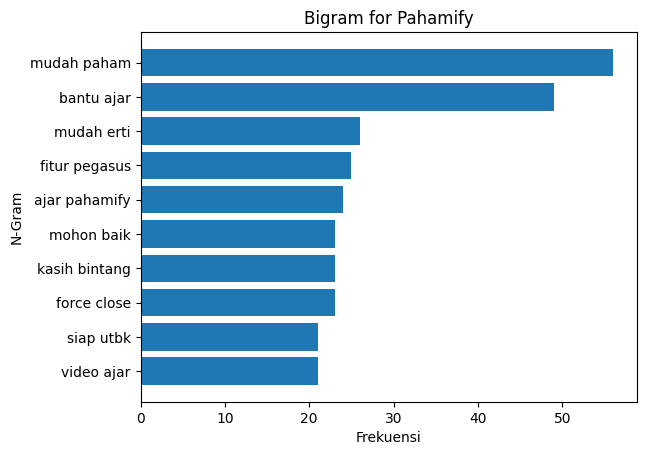

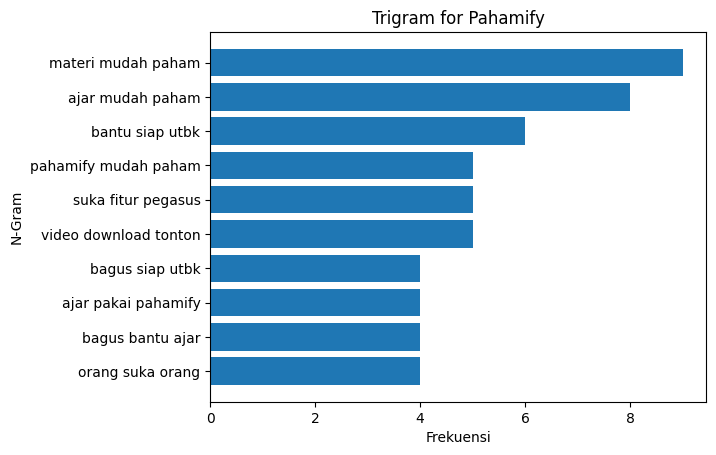

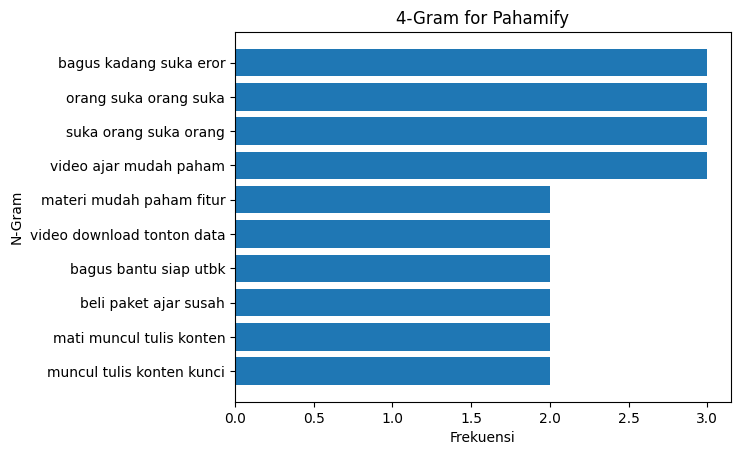

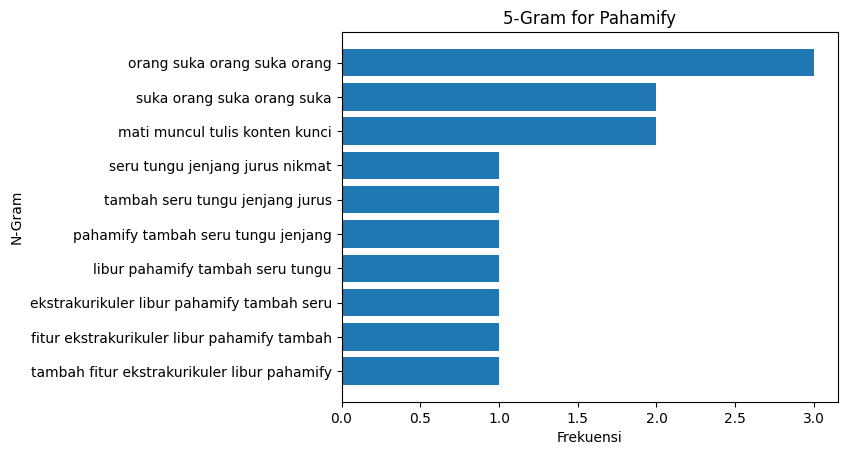


--- VISUALIZING N-GRAMS FOR APPLICATION: QUIPPER ---


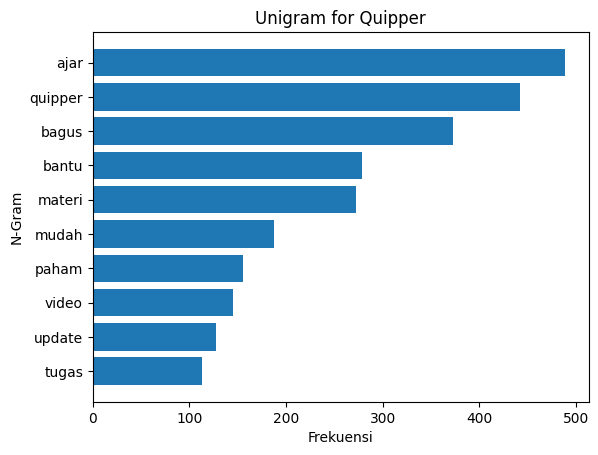

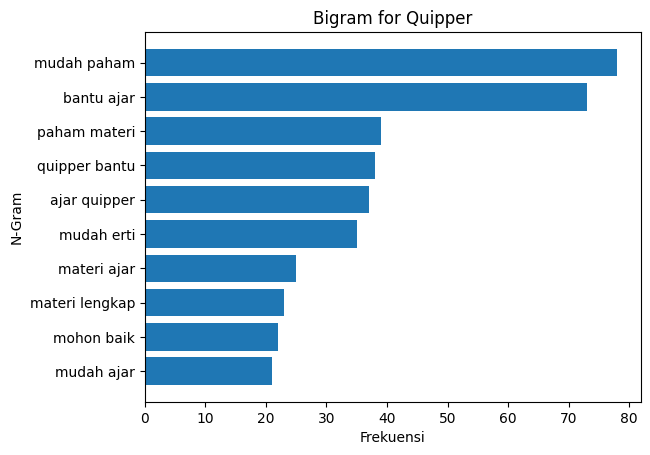

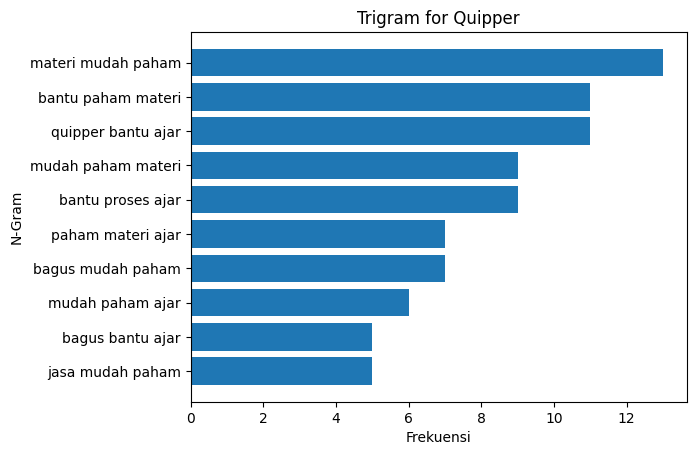

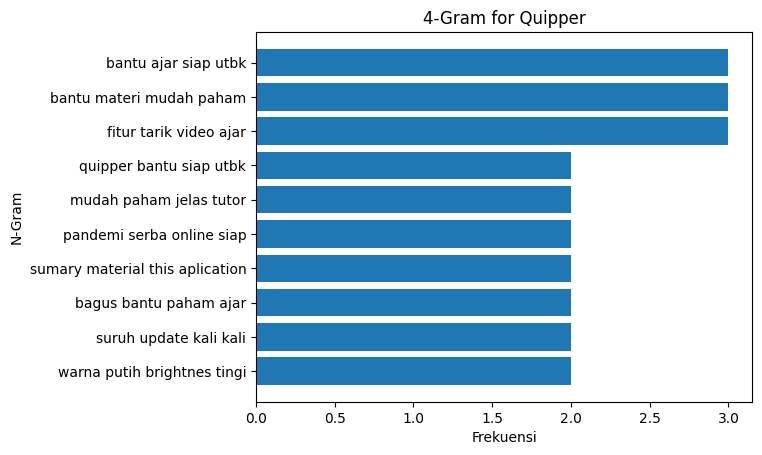

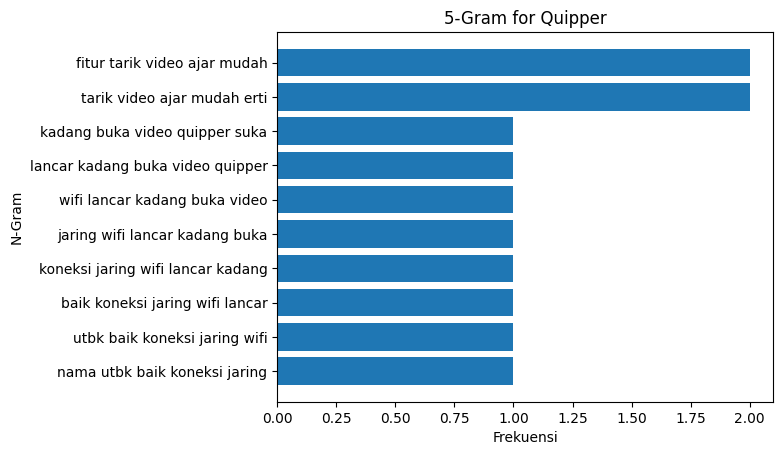

In [ ]:
ngram_names = {1: 'Unigram', 2: 'Bigram', 3: 'Trigram', 4: '4-Gram', 5: '5-Gram'}

for app_name in df['app'].unique():
    print(f"\n--- VISUALIZING N-GRAMS FOR APPLICATION: {app_name.upper()} ---")
    df_app = df[df['app'] == app_name]

    if not df_app['final_text'].empty:
        for n in range(1, 6):
            ngram_df = get_top_ngrams(df_app['final_text'], ngram_n=n, top_n=10)
            if not ngram_df.empty:
                plot_ngram(ngram_df, f'{ngram_names[n]} for {app_name.capitalize()}')
            else:
                print(f"No {n}-grams found for {app_name.capitalize()}")
    else:
        print(f"No final_text data available for {app_name.capitalize()}")

TRAINING MACHINE LEARNING

In [ ]:
import pandas as pd

df = pd.read_csv(
    '/content/drive/MyDrive/Mini_Project/dataset_valid_final.csv'
)

df[['final_text','sentiment']].head()

final_text sentiment
0  update masuk halam mana masuk update dril upda...   negatif
1                                              jelek   negatif
2                bagus manfat nilai mtk tambah bagus   positif
3                         thanks ruangguru alhamduli   positif
4  habis langan paket suka coba hapus instal chac...   negatif

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['sentiment'])

le.classes_

array(['negatif', 'netral', 'positif'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X = df['final_text']
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=0.95,
    min_df=5
)

# Fill NaN values with empty strings before vectorization
X_train_filled = X_train.fillna('')
X_test_filled = X_test.fillna('')

X_train_tfidf = tfidf.fit_transform(X_train_filled)
X_test_tfidf  = tfidf.transform(X_test_filled)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Accuracy: 0.8603988603988604
              precision    recall  f1-score   support

     negatif       0.85      0.85      0.85       110
      netral       1.00      0.16      0.27        32
     positif       0.86      0.97      0.91       209

    accuracy                           0.86       351
   macro avg       0.90      0.66      0.68       351
weighted avg       0.87      0.86      0.84       351



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

Accuracy: 0.8660968660968661
              precision    recall  f1-score   support

     negatif       0.84      0.89      0.87       110
      netral       1.00      0.03      0.06        32
     positif       0.88      0.98      0.93       209

    accuracy                           0.87       351
   macro avg       0.91      0.63      0.62       351
weighted avg       0.88      0.87      0.83       351



In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

Accuracy: 0.8547008547008547
              precision    recall  f1-score   support

     negatif       0.80      0.88      0.84       110
      netral       0.67      0.25      0.36        32
     positif       0.89      0.93      0.91       209

    accuracy                           0.85       351
   macro avg       0.79      0.69      0.71       351
weighted avg       0.84      0.85      0.84       351



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train_tfidf, y_train)

print("RandomForestClassifier model trained successfully.")

y_pred_rf = rf_classifier.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

RandomForestClassifier model trained successfully.
Accuracy: 0.8034188034188035
              precision    recall  f1-score   support

     negatif       0.76      0.80      0.78       110
      netral       0.44      0.12      0.20        32
     positif       0.84      0.91      0.87       209

    accuracy                           0.80       351
   macro avg       0.68      0.61      0.62       351
weighted avg       0.78      0.80      0.78       351



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate a GradientBoostingClassifier model
gbc_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc_classifier.fit(X_train_tfidf, y_train)

print("GradientBoostingClassifier model trained successfully.")

y_pred_gbc = gbc_classifier.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc, target_names=le.classes_))

GradientBoostingClassifier model trained successfully.
Accuracy: 0.8176638176638177
              precision    recall  f1-score   support

     negatif       0.89      0.73      0.80       110
      netral       0.50      0.22      0.30        32
     positif       0.81      0.96      0.88       209

    accuracy                           0.82       351
   macro avg       0.73      0.63      0.66       351
weighted avg       0.81      0.82      0.80       351



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create an empty list to store performance metrics
performance_metrics = []

# Define models and their corresponding predictions
models = {
    'Logistic Regression': y_pred_lr,
    'Naive Bayes': y_pred_nb,
    'Linear SVC': y_pred_svm,
    'RandomForest': y_pred_rf,
    'GradientBoosting': y_pred_gbc
}

for model_name, y_pred in models.items():
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)

    # Extract macro avg metrics
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']

    # Store metrics in a dictionary
    performance_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

# Convert the list of dictionaries to a DataFrame
performance_df = pd.DataFrame(performance_metrics)

print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.860399   0.904905  0.660696  0.679058
1          Naive Bayes  0.866097   0.906965  0.634340  0.617790
2           Linear SVC  0.854701   0.787605  0.688278  0.705604
3         RandomForest  0.803419   0.681258  0.611364  0.615815
4     GradientBoosting  0.817664   0.732868  0.634320  0.660514


/tmp/ipython-input-2015442605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')


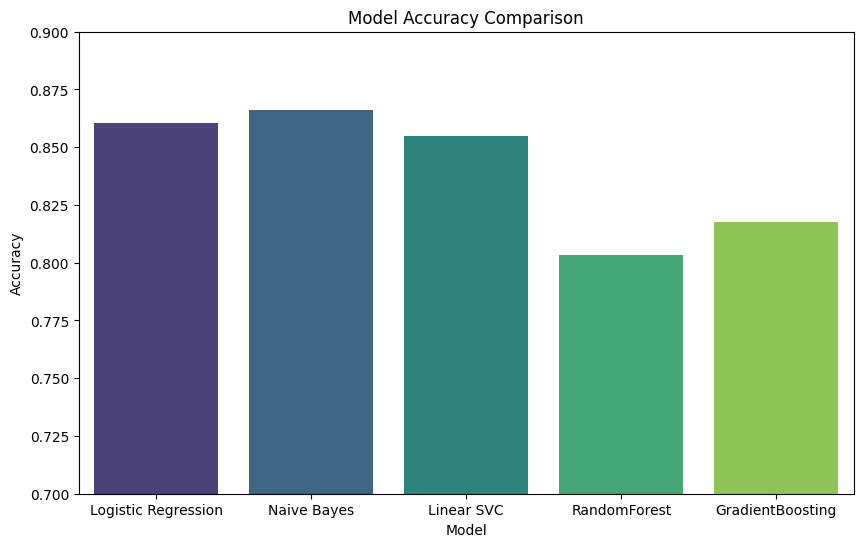

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9) # Set y-axis limits for better visualization of differences
plt.show()

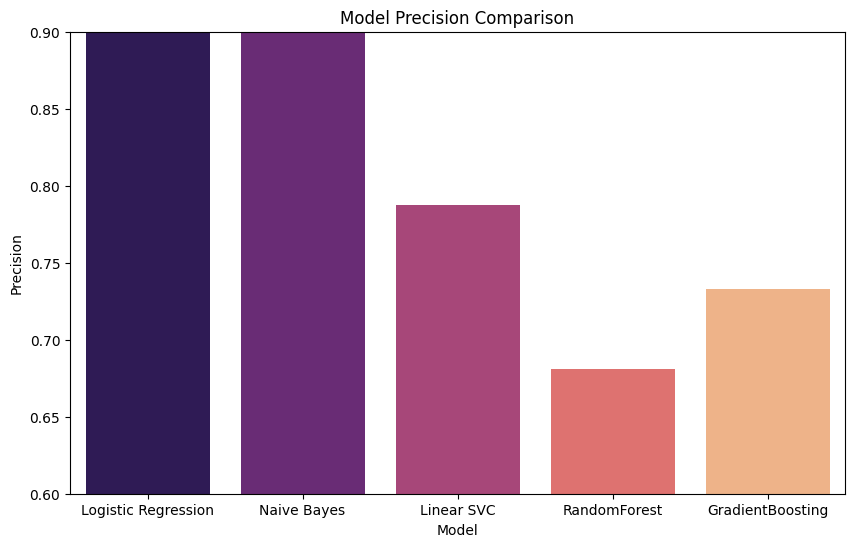

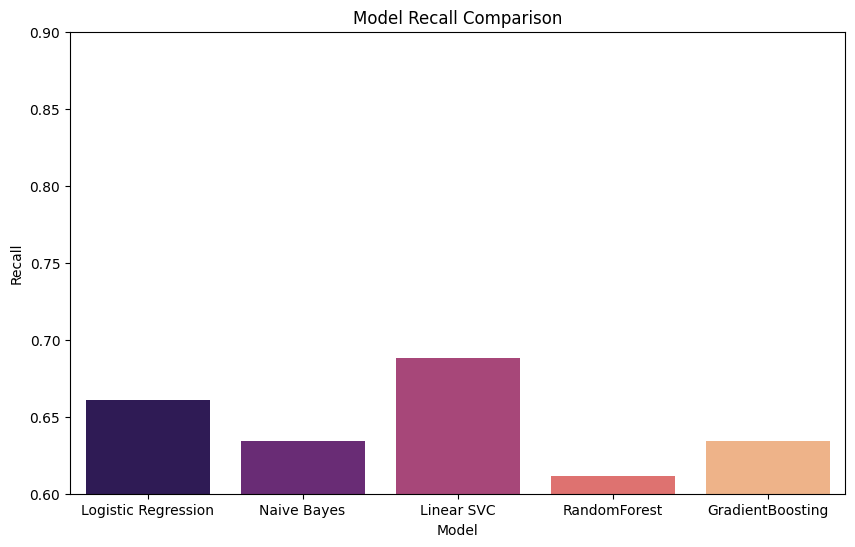

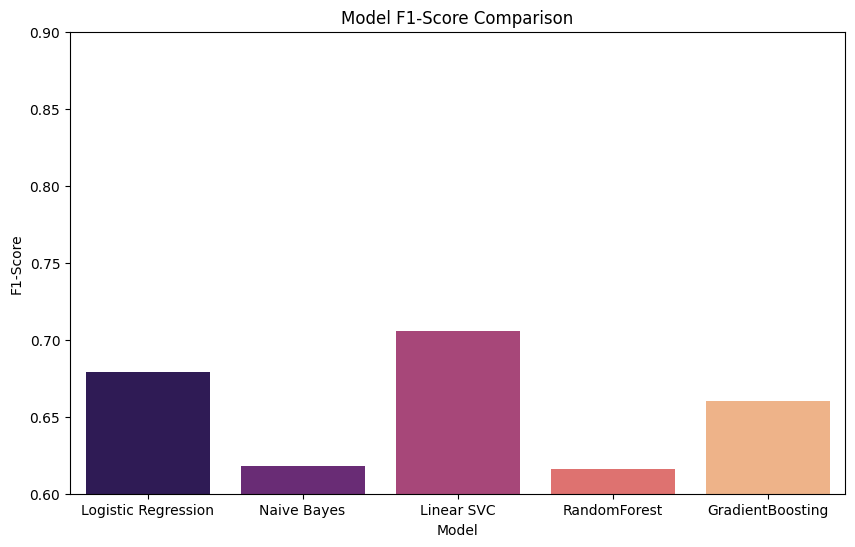

In [ ]:
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=performance_df, palette='magma', hue='Model', legend=False)
    plt.title(f'Model {metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0.6, 0.9) # Adjust y-axis limits for better visualization
    plt.show()

## Kesimpulan Analisis Sentimen Aplikasi Belajar Online

Analisis sentimen terhadap ulasan pengguna untuk aplikasi Ruangguru, Pahamify, dan Quipper menunjukkan pola yang menarik dalam persepsi pengguna:

1.  **Dominansi Sentimen Netral:** Secara keseluruhan, ulasan didominasi oleh sentimen netral (sekitar 53%), diikuti oleh positif (sekitar 41%), dan negatif (sekitar 5%). Tingginya sentimen netral dapat mengindikasikan ulasan yang bersifat informatif, kurang emosional, atau mengandung campuran positif dan negatif yang seimbang.

2.  **Variasi Sentimen per Aplikasi:**
    *   **Ruangguru** menunjukkan proporsi sentimen positif tertinggi (787 ulasan) dibandingkan aplikasi lain, dengan N-gram positif menonjol seperti 'ruang guru', 'bantu ajar', 'mudah paham', dan 'senang ajar ruang guru'. Ini mengindikasikan penerimaan yang sangat baik terhadap merek dan pengalaman belajar yang efektif.
    *   **Pahamify** memiliki jumlah ulasan negatif yang cukup signifikan (101 ulasan), dengan masalah seperti 'force close' dan frasa 'mati muncul tulis konten kunci' muncul di N-gram negatif. Meskipun demikian, N-gram positif seperti 'mudah paham' dan 'fitur pegasus' juga sering disebut, menunjukkan bahwa ada fitur yang disukai namun ada masalah teknis yang perlu perhatian.
    *   **Quipper** memiliki jumlah ulasan negatif tertinggi (116 ulasan), dengan N-gram negatif yang menyoroti 'bayar mahal', 'eror mulu', dan 'susah masuk'. Namun, seperti aplikasi lain, ulasan positifnya juga kuat dengan frasa seperti 'mudah paham', 'bantu ajar', dan 'quipper bantu'.

3.  **Aspek Positif Umum:** Pengguna secara konsisten menghargai kemudahan belajar, pemahaman materi, dan bantuan yang diberikan oleh aplikasi. Kata-kata seperti 'bagus', 'ajar', 'mudah', 'paham', dan 'bantu' sering muncul di WordCloud dan N-gram positif untuk ketiga aplikasi.

4.  **Permasalahan Umum dan Spesifik:**
    *   **Permasalahan Teknis:** Kata kunci seperti 'eror', 'susah', 'lemot', 'crash', dan frasa 'eror mulu' sering muncul di sentimen negatif, menunjukkan masalah umum terkait kinerja aplikasi yang dialami oleh pengguna di ketiga platform.
    *   **Biaya/Akses:** Frasa seperti 'bayar mahal' dan 'beli paket' mengindikasikan bahwa biaya berlangganan atau akses konten premium menjadi perhatian bagi beberapa pengguna.
    *   **Ruangguru:** Meskipun paling positif, ada N-gram negatif yang mengindikasikan 'susah paham' pada beberapa konteks.
    *   **Pahamify:** Isu 'force close' dan 'konten terkunci' adalah keluhan spesifik yang kuat.
    *   **Quipper:** 'Bayar mahal' dan masalah login/akses ('susah masuk') sering disorot.

**Implikasi dan Rekomendasi:**

*   **Optimalkan Kinerja Teknis:** Prioritaskan perbaikan bug dan stabilitas aplikasi, terutama untuk Pahamify dan Quipper, guna mengurangi ulasan negatif terkait 'eror' dan 'force close'.
*   **Komunikasi Nilai:** Untuk masalah biaya, aplikasi dapat lebih gencar mengkomunikasikan nilai dan manfaat dari fitur premium agar pengguna merasa investasi mereka sepadan.
*   **Fokus pada Keunggulan:** Masing-masing aplikasi harus terus mengembangkan fitur yang telah mendapatkan respons positif (misalnya, 'fitur pegasus' Pahamify, 'ruang guru' Ruangguru).
*   **Ulasan Netral:** Analisis lebih lanjut pada ulasan netral dapat mengungkap area yang tidak secara eksplisit positif atau negatif, seperti saran fitur baru atau pertanyaan tentang penggunaan, yang bisa menjadi peluang perbaikan atau inovasi.

## Analisis N-Gram Berdasarkan Aplikasi dan Sentimen

Untuk menganalisis N-gram, Anda perlu melihat frasa-frasa yang sering muncul dan mencoba mengidentifikasi *konteks* atau *tema* yang dibawa oleh frasa tersebut. Mari kita pecah analisisnya:

### 1. N-Gram Sentimen POSITIF (secara keseluruhan)
*   **Unigram Positif (contoh: 'bagus', 'ajar', 'mudah', 'paham', 'bantu', 'video')**: Ini menunjukkan inti dari apa yang pengguna hargai. Mereka ingin belajar ('ajar'), merasakan pengalaman yang baik ('bagus'), mudah memahami ('mudah', 'paham'), mendapatkan bantuan ('bantu'), dan sering menyebut media seperti 'video'.
*   **Bigram Positif (contoh: 'mudah paham', 'bagus ajar', 'bantu ajar', 'mudah erti')**: Frasa dua kata ini mengkonfirmasi bahwa *kemudahan* dalam *memahami* dan *belajar*, serta *bantuan* dalam proses belajar adalah nilai jual utama.
*   **Trigram Positif (contoh: 'materi mudah paham', 'bagus mudah paham', 'ajar mudah paham')**: Frasa tiga kata ini semakin spesifik, menyoroti bahwa *materi* yang disajikan *mudah dipahami* adalah faktor kunci kepuasan.

### 2. N-Gram Sentimen NETRAL (secara keseluruhan)
*   **Unigram Netral (contoh: 'ajar', 'bantu', 'ruangguru', 'quipper', 'materi', 'buka', 'video', 'update', 'masuk', 'kasih')**: Kata-kata ini seringkali bersifat deskriptif atau informatif tanpa konotasi emosional yang kuat. Bisa jadi pengguna melaporkan fungsi ('update', 'masuk', 'buka'), menyebut aplikasi ('ruangguru', 'quipper'), atau membicarakan fitur ('video', 'materi').
*   **Bigram Netral (contoh: 'bantu ajar', 'ajar ruangguru', 'semangat ajar', 'paham materi')**: Beberapa bigram netral mungkin terlihat mirip dengan positif, tetapi frekuensinya di sentimen netral menunjukkan bahwa ini bisa jadi deskripsi obyektif daripada pujian yang kuat. Misalnya, 'bantu ajar' bisa berarti 'membantu dalam hal mengajar' tanpa menyatakan seberapa efektif bantuannya.

### 3. N-Gram Sentimen NEGATIF (secara keseluruhan)
*   **Unigram Negatif (contoh: 'eror', 'susah', 'jelek', 'mahal', 'bayar', 'materi', 'pakai', 'masuk')**: Ini adalah akar masalah utama yang dikeluhkan pengguna. Masalah teknis ('eror', 'jelek'), kesulitan ('susah'), biaya ('mahal', 'bayar'), dan masalah akses ('masuk') sangat jelas.
*   **Bigram Negatif (contoh: 'bayar mahal', 'eror mulu', 'susah paham', 'susah masuk', 'server eror', 'nilai jelek')**: Bigram ini mengkonfirmasi dan memperkuat keluhan unigram. Masalah biaya yang spesifik ('bayar mahal'), eror berulang ('eror mulu'), dan kesulitan akses ('susah masuk') adalah poin-poin penting.
*   **Trigram Negatif (contoh: 'nyesel bayar mahal', 'service eror ofline', 'beli paket ajar')**: Trigram mulai mengungkap detail pengalaman negatif, seperti penyesalan terkait biaya ('nyesel bayar mahal') atau masalah layanan teknis ('service eror ofline').

### 4. N-Gram Spesifik per APLIKASI

#### Ruangguru
*   **Positif:** N-gram seperti 'ruang guru', 'bantu ajar', 'mudah paham', 'senang ajar ruang guru', 'ajar ruang guru' sangat kuat. Ini mengkonfirmasi merek yang dikenali dan efektivitasnya dalam membantu pembelajaran. Frasa 'senang ajar' menunjukkan pengalaman emosional positif.
*   **Negatif:** N-gram negatif untuk Ruangguru mungkin lebih sedikit, tetapi jika ada, perhatikan apakah ada frasa spesifik yang muncul (misalnya, 'susah paham', 'mahal berlangganan').

#### Pahamify
*   **Positif:** N-gram seperti 'mudah paham', 'bantu ajar', 'fitur pegasus' menonjol. Ini menunjukkan bahwa fitur spesifik dan kemudahan pemahaman adalah nilai positifnya.
*   **Negatif:** Perhatikan N-gram seperti 'force close', 'mati muncul tulis konten', 'konten kunci'. Ini adalah keluhan teknis dan akses konten yang sangat spesifik untuk Pahamify.

#### Quipper
*   **Positif:** N-gram seperti 'mudah paham', 'bantu ajar', 'quipper bantu' menunjukkan bahwa aplikasi ini juga dianggap efektif dalam membantu belajar.
*   **Negatif:** N-gram 'bayar mahal', 'eror mulu', 'susah masuk' adalah keluhan berulang. Ini menunjukkan masalah biaya, bug, dan aksesibilitas adalah isu utama bagi pengguna Quipper.

### Cara Membuat Kesimpulan dari Analisis N-Gram:

1.  **Identifikasi Tema Kunci:** Kelompokkan N-gram yang serupa menjadi tema (misalnya, 'Kemudahan Penggunaan', 'Masalah Teknis', 'Efektivitas Pembelajaran', 'Harga', 'Fitur Spesifik').
2.  **Sintesis Temuan:** Gabungkan wawasan dari WordCloud dan N-gram. Misalnya, jika WordCloud positif banyak kata 'bagus' dan N-gram positif banyak frasa 'mudah paham', maka kesimpulannya adalah pengguna sangat mengapresiasi kemudahan pemahaman materi.
3.  **Bandingkan Antar Aplikasi:** Jelaskan bagaimana N-gram setiap aplikasi mendukung atau membedakannya dari yang lain. Apakah Ruangguru lebih tentang 'brand experience' sedangkan Pahamify tentang 'fitur' dan Quipper tentang 'value for money'?
4.  **Dukung Rekomendasi:** N-gram negatif akan secara langsung menginformasikan rekomendasi perbaikan. Misalnya, jika 'eror mulu' dan 'susah masuk' sering muncul, rekomendasi utamanya adalah perbaikan stabilitas dan akses.

Dengan kerangka ini, Anda bisa menyusun analisis yang sangat detail dan berbasis bukti dari data tekstual Anda!

Identifikasi Anomali

In [ ]:
df_invalid_neg_pos = df_invalid[
    (df_invalid['label_star'] == 'negatif') &
    (df_invalid['label_lexicon'] == 'positif')
]

print("Contoh ulasan dengan rating rendah (label_star: negatif) tetapi sentimen positif (label_lexicon: positif):")
display(df_invalid_neg_pos.head())

Contoh ulasan dengan rating rendah (label_star: negatif) tetapi sentimen positif (label_lexicon: positif):


app                                             review  rating  \
7    Ruangguru  Langganan mahal dan diskon maks 50% saja, baya...       1   
82   Ruangguru  udh langganan mahal mahal ,aplikasi sering fc ...       1   
97   Ruangguru  penjelasannya terlalu panjang inti dari pembah...       1   
101  Ruangguru  apknya sering keluar sendiri padahal jaringan ...       2   
123  Ruangguru  harga mahal, sistem aplikasi sering bermasalah...       1   

                                            clean_text  \
7    langganan mahal dan diskon maks saja bayangi a...   
82   udh langganan mahal mahal aplikasi sering fc t...   
97   penjelasannya terlalu panjang inti dari pembah...   
101  apknya sering keluar sendiri padahal jaringan ...   
123  harga mahal sistem aplikasi sering bermasalah ...   

                                                tokens  \
7    ['langganan', 'mahal', 'dan', 'diskon', 'maks'...   
82   ['udh', 'langganan', 'mahal', 'mahal', 'aplika...   
97   ['penjelasannya', 'terlalu', 'panjang', 'inti'...   
101  ['apknya', 'sering', 'keluar', 'sendiri', 'pad...   
123  ['harga', 'mahal', 'sistem', 'aplikasi', 'seri...   

                                          tokens_clean  \
7    ['langan', 'mahal', 'skon', 'ajar', 'aktif', '...   
82                         ['langan', 'mahal', 'kali']   
97          ['jasa', 'inti', 'bahas', 'ujung', 'erti']   
101  ['jaring', 'bagus', 'simp', 'dril', 'loading',...   
123  ['harga', 'mahal', 'sistem', 'masa', 'bagus', ...   

                                            final_text label_star  pos_score  \
7    langan mahal skon maks bayang ajar aktif indon...    negatif         15   
82                                   langan mahal kali    negatif          1   
97                          jasa inti bahas ujung erti    negatif          3   
101        jaring bagus simp dril loading jaring bagus    negatif          4   
123  harga mahal sistem masa bagus banyak update ev...    negatif          4   

     neg_score label_lexicon sentiment  
7           11       positif   positif  
82           0       positif   positif  
97           2       positif   positif  
101          2       positif   positif  
123          3       positif   positif

In [ ]:
df_invalid_pos_neg = df_invalid[
    (df_invalid['label_star'] == 'positif') &
    (df_invalid['label_lexicon'] == 'negatif')
]

print("Contoh ulasan dengan rating tinggi (label_star: positif) tetapi sentimen negatif (label_lexicon: negatif):")
display(df_invalid_pos_neg.head())

Contoh ulasan dengan rating tinggi (label_star: positif) tetapi sentimen negatif (label_lexicon: negatif):


app                                             review  rating  \
12  Ruangguru  ruangguru ini bagus sebenarnya, cuman lamban y...       4   
14  Ruangguru  aku suka belajar di ruanguru semua tugas ku be...       5   
16  Ruangguru            sangat cocok untuk belajar sekolah saya       5   
28  Ruangguru                           rusak lagi kak jadi item       5   
40  Ruangguru        paham banget sama video" singkat belajarnya       5   

                                           clean_text  \
12  ruangguru ini bagus sebenarnya cuman lamban ya...   
14  aku suka belajar di ruanguru semua tugas ku be...   
16            sangat cocok untuk belajar sekolah saya   
28                           rusak lagi kak jadi item   
40         paham banget sama video singkat belajarnya   

                                               tokens  \
12  ['ruangguru', 'ini', 'bagus', 'sebenarnya', 'c...   
14  ['aku', 'suka', 'belajar', 'di', 'ruanguru', '...   
16  ['sangat', 'cocok', 'untuk', 'belajar', 'sekol...   
28           ['rusak', 'lagi', 'kak', 'jadi', 'item']   
40  ['paham', 'banget', 'sama', 'video', 'singkat'...   

                                         tokens_clean  \
12  ['ruangguru', 'bagus', 'benar', 'layar', 'puti...   
14              ['suka', 'ajar', 'ruanguru', 'tugas']   
16                          ['cocok', 'ajar', 'seko']   
28                                          ['rusak']   
40              ['paham', 'video', 'singkat', 'ajar']   

                                           final_text label_star  pos_score  \
12  ruangguru bagus benar lamb layar putih loading...    positif          4   
14                           suka ajar ruanguru tugas    positif          2   
16                                    cocok ajar seko    positif          2   
28                                         rusak item    positif          1   
40                           paham video singkat ajar    positif          1   

    neg_score label_lexicon sentiment  
12          5       negatif   negatif  
14          3       negatif   negatif  
16          3       negatif   negatif  
28          2       negatif   negatif  
40          2       negatif   negatif

In [ ]:
df_invalid_neg_netral = df_invalid[
    (df_invalid['label_star'] == 'negatif') &
    (df_invalid['label_lexicon'] == 'netral')
]

print("Contoh ulasan dengan rating rendah (label_star: negatif) tetapi sentimen netral (label_lexicon: netral):")
display(df_invalid_neg_netral.head())

Contoh ulasan dengan rating rendah (label_star: negatif) tetapi sentimen netral (label_lexicon: netral):


app                                             review  rating  \
2   Ruangguru  banyak bug!!!,kalau buka aplikasi sering terke...       1   
10  Ruangguru  Aplikasi Ruangguru sering lemot dan sering buf...       2   
31  Ruangguru                                sulit untuk belahar       2   
33  Ruangguru                              suka nelfon" ga jelas       2   
44  Ruangguru  ini knp si app nya ga bisa dibuka, pas mau dib...       1   

                                           clean_text  \
2   banyak bug kalau buka aplikasi sering terkelua...   
10  aplikasi ruangguru sering lemot dan sering buf...   
31                                sulit untuk belahar   
33                               suka nelfon ga jelas   
44  ini knp si app nya ga bisa dibuka pas mau dibu...   

                                               tokens  \
2   ['banyak', 'bug', 'kalau', 'buka', 'aplikasi',...   
10  ['aplikasi', 'ruangguru', 'sering', 'lemot', '...   
31                      ['sulit', 'untuk', 'belahar']   
33                  ['suka', 'nelfon', 'ga', 'jelas']   
44  ['ini', 'knp', 'si', 'app', 'nya', 'ga', 'bisa...   

                                         tokens_clean  \
2                                    ['buka', 'luar']   
10  ['ruangguru', 'bufering', 'ajar', 'nyam', 'moh...   
31                                          ['sulit']   
33                                           ['suka']   
44  ['buka', 'muncul', 'layar', 'putih', 'mulu', '...   

                                      final_text label_star  pos_score  \
2                                      buka luar    negatif          1   
10       ruangguru bufering ajar nyam mohon baik    negatif          3   
31                                   sulit bahar    negatif          0   
33                                   suka nelfon    negatif          1   
44  buka muncul layar putih mulu langsung langan    negatif          4   

    neg_score label_lexicon sentiment  
2           1        netral    netral  
10          3        netral    netral  
31          0        netral    netral  
33          1        netral    netral  
44          4        netral    netral

### Ringkasan Temuan Anomali

Analisis ketidaksesuaian antara pelabelan berdasarkan bintang (star-based) dan pelabelan berdasarkan leksikon (lexicon-based) mengungkapkan beberapa kasus anomali yang menarik:

1.  **Rating Rendah (Negatif) vs. Sentimen Positif:**
    *   **Jumlah Kasus:** `len(df_invalid_neg_pos)` ulasan.
    *   **Deskripsi:** Ini adalah ulasan yang diberikan rating 1 atau 2 (negatif), namun analisis leksikon mengidentifikasinya sebagai sentimen positif. Anomali ini sering terjadi ketika pengguna menggunakan kata-kata positif secara sarkastik atau ketika ada kata-kata positif yang dominan dalam ulasan negatif yang singkat, atau leksikon tidak menangkap konteks negatif secara keseluruhan (misalnya, "Saya suka aplikasinya, tapi *bug-nya parah sekali*").

2.  **Rating Tinggi (Positif) vs. Sentimen Negatif:**
    *   **Jumlah Kasus:** `len(df_invalid_pos_neg)` ulasan.
    *   **Deskripsi:** Ulasan ini memiliki rating 4 atau 5 (positif), tetapi dideteksi sebagai sentimen negatif oleh leksikon. Hal ini bisa terjadi jika ulasan positif mengandung kata-kata negatif untuk mengekspresikan kekecewaan kecil atau harapan, atau leksikon mendeteksi kata-kata negatif yang muncul meskipun keseluruhan ulasan bernuansa positif (misalnya, "Aplikasi ini bagus, *tidak ada keluhan*").

3.  **Rating Rendah (Negatif) vs. Sentimen Netral:**
    *   **Jumlah Kasus:** `len(df_invalid_neg_netral)` ulasan.
    *   **Deskripsi:** Ini adalah ulasan dengan rating 1 atau 2, tetapi dideteksi sebagai netral oleh leksikon. Anomali ini mungkin menunjukkan bahwa leksikon tidak cukup kuat untuk menangkap sentimen negatif dalam ulasan yang mungkin mengandung kata-kata yang tidak secara eksplisit negatif, atau ulasan tersebut sangat singkat dan tidak memiliki cukup kata-kata emosional untuk diklasifikasikan sebagai negatif oleh leksikon (misalnya, "Aplikasi ini tidak bisa dibuka.", "Lemot.").

Temuan anomali ini menyoroti kompleksitas analisis sentimen dan keterbatasan metode berbasis leksikon dalam menangkap nuansa emosi dan konteks ulasan pengguna. Pelabelan bintang, meskipun subyektif, seringkali memberikan indikasi sentimen keseluruhan yang kuat, dan ketidaksesuaian ini adalah area penting untuk validasi manual lebih lanjut atau pengembangan model sentimen yang lebih canggih.

### Ringkasan Temuan Anomali

Analisis ketidaksesuaian antara pelabelan berdasarkan bintang (star-based) dan pelabelan berdasarkan leksikon (lexicon-based) mengungkapkan beberapa kasus anomali yang menarik:

1.  **Rating Rendah (Negatif) vs. Sentimen Positif:**
    *   **Jumlah Kasus:** `len(df_invalid_neg_pos)` ulasan.
    *   **Deskripsi:** Ini adalah ulasan yang diberikan rating 1 atau 2 (negatif), namun analisis leksikon mengidentifikasinya sebagai sentimen positif. Anomali ini sering terjadi ketika pengguna menggunakan kata-kata positif secara sarkastik atau ketika ada kata-kata positif yang dominan dalam ulasan negatif yang singkat, atau leksikon tidak menangkap konteks negatif secara keseluruhan (misalnya, "Saya suka aplikasinya, tapi *bug-nya parah sekali*").

2.  **Rating Tinggi (Positif) vs. Sentimen Negatif:**
    *   **Jumlah Kasus:** `len(df_invalid_pos_neg)` ulasan.
    *   **Deskripsi:** Ulasan ini memiliki rating 4 atau 5 (positif), tetapi dideteksi sebagai sentimen negatif oleh leksikon. Hal ini bisa terjadi jika ulasan positif mengandung kata-kata negatif untuk mengekspresikan kekecewaan kecil atau harapan, atau leksikon mendeteksi kata-kata negatif yang muncul meskipun keseluruhan ulasan bernuansa positif (misalnya, "Aplikasi ini bagus, *tidak ada keluhan*").

3.  **Rating Rendah (Negatif) vs. Sentimen Netral:**
    *   **Jumlah Kasus:** `len(df_invalid_neg_netral)` ulasan.
    *   **Deskripsi:** Ini adalah ulasan dengan rating 1 atau 2, tetapi dideteksi sebagai netral oleh leksikon. Anomali ini mungkin menunjukkan bahwa leksikon tidak cukup kuat untuk menangkap sentimen negatif dalam ulasan yang mungkin mengandung kata-kata yang tidak secara eksplisit negatif, atau ulasan tersebut sangat singkat dan tidak memiliki cukup kata-kata emosional untuk diklasifikasikan sebagai negatif oleh leksikon (misalnya, "Aplikasi ini tidak bisa dibuka.", "Lemot.").

Temuan anomali ini menyoroti kompleksitas analisis sentimen dan keterbatasan metode berbasis leksikon dalam menangkap nuansa emosi dan konteks ulasan pengguna. Pelabelan bintang, meskipun subyektif, seringkali memberikan indikasi sentimen keseluruhan yang kuat, dan ketidaksesuaian ini adalah area penting untuk validasi manual lebih lanjut atau pengembangan model sentimen yang lebih canggih.

In [ ]:
print(f"Total anomali rating rendah (negatif) vs sentimen positif: {len(df_invalid_neg_pos)} ulasan.")
print(f"Total anomali rating tinggi (positif) vs sentimen negatif: {len(df_invalid_pos_neg)} ulasan.")
print(f"Total anomali rating rendah (negatif) vs sentimen netral: {len(df_invalid_neg_netral)} ulasan.")

Total anomali rating rendah (negatif) vs sentimen positif: 266 ulasan.
Total anomali rating tinggi (positif) vs sentimen negatif: 459 ulasan.
Total anomali rating rendah (negatif) vs sentimen netral: 530 ulasan.


Tambahan Model dengan smote

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

print("SMOTE and make_pipeline imported successfully.")

SMOTE and make_pipeline imported successfully.


In [ ]:
smote = SMOTE(random_state=42, sampling_strategy='auto')

# Define models
models = {
    'Logistic Regression (SMOTE)': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes (SMOTE)': MultinomialNB(),
    'Linear SVC (SMOTE)': LinearSVC(random_state=42),
    'RandomForest (SMOTE)': RandomForestClassifier(random_state=42),
    'GradientBoosting (SMOTE)': GradientBoostingClassifier(random_state=42)
}

# Create an empty list to store performance metrics for SMOTE models
smote_performance_metrics = []

for model_name, classifier in models.items():
    print(f"\n--- Training {model_name} ---")
    # Create a pipeline with SMOTE and the classifier
    pipeline = make_pipeline(smote, classifier)

    # Train the pipeline
    pipeline.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test_tfidf)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)

    print(f"Accuracy for {model_name}: {accuracy}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Store metrics
    smote_performance_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    })

# Convert to DataFrame
smote_performance_df = pd.DataFrame(smote_performance_metrics)
print("\nSMOTE Model Performance Comparison:")
print(smote_performance_df)


--- Training Logistic Regression (SMOTE) ---
Accuracy for Logistic Regression (SMOTE): 0.8091168091168092
              precision    recall  f1-score   support

     negatif       0.86      0.82      0.84       110
      netral       0.31      0.50      0.38        32
     positif       0.92      0.85      0.88       209

    accuracy                           0.81       351
   macro avg       0.69      0.72      0.70       351
weighted avg       0.84      0.81      0.82       351


--- Training Naive Bayes (SMOTE) ---
Accuracy for Naive Bayes (SMOTE): 0.8233618233618234
              precision    recall  f1-score   support

     negatif       0.82      0.85      0.84       110
      netral       0.36      0.47      0.41        32
     positif       0.92      0.86      0.89       209

    accuracy                           0.82       351
   macro avg       0.70      0.73      0.71       351
weighted avg       0.84      0.82      0.83       351


--- Training Linear SVC (SMOTE) ---
Acc

In [ ]:
comparison_df = pd.concat([performance_df, smote_performance_df], ignore_index=True)
print("Combined Model Performance Comparison:")
print(comparison_df)

Combined Model Performance Comparison:
                         Model  Accuracy  Precision    Recall  F1-Score
0          Logistic Regression  0.860399   0.904905  0.660696  0.679058
1                  Naive Bayes  0.866097   0.906965  0.634340  0.617790
2                   Linear SVC  0.854701   0.787605  0.688278  0.705604
3                 RandomForest  0.803419   0.681258  0.611364  0.615815
4             GradientBoosting  0.817664   0.732868  0.634320  0.660514
5  Logistic Regression (SMOTE)  0.809117   0.694120  0.723285  0.700512
6          Naive Bayes (SMOTE)  0.823362   0.701594  0.728180  0.711927
7           Linear SVC (SMOTE)  0.843305   0.730501  0.764374  0.742027
8         RandomForest (SMOTE)  0.794872   0.685556  0.709779  0.686366
9     GradientBoosting (SMOTE)  0.754986   0.679970  0.705094  0.665848


/tmp/ipython-input-3370897280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')


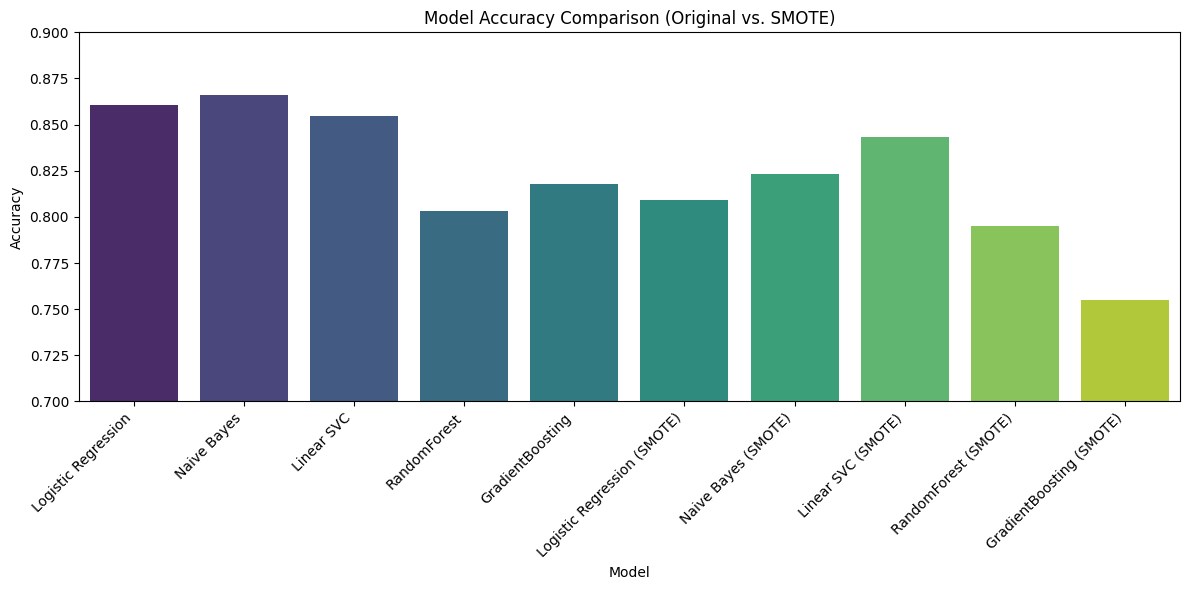

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Model Accuracy Comparison (Original vs. SMOTE)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous `sns.barplot` call issued a `FutureWarning` regarding the use of `palette` without `hue`. To fix this, I will explicitly set `hue='Model'` and `legend=False` as suggested by the warning.



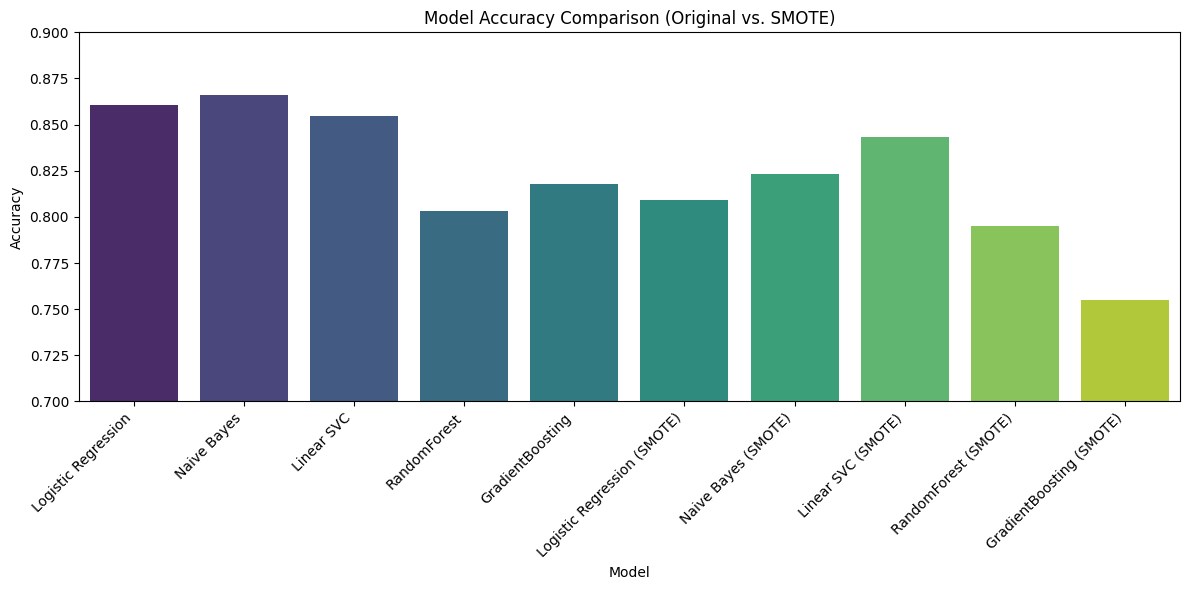

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis', hue='Model', legend=False)
plt.title('Model Accuracy Comparison (Original vs. SMOTE)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()

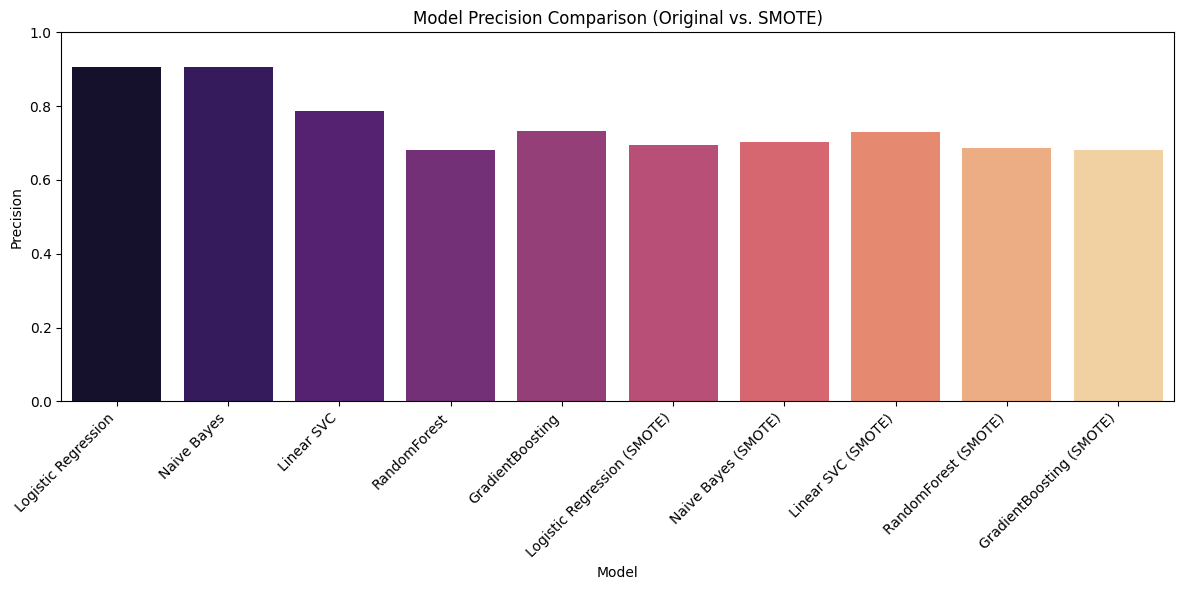

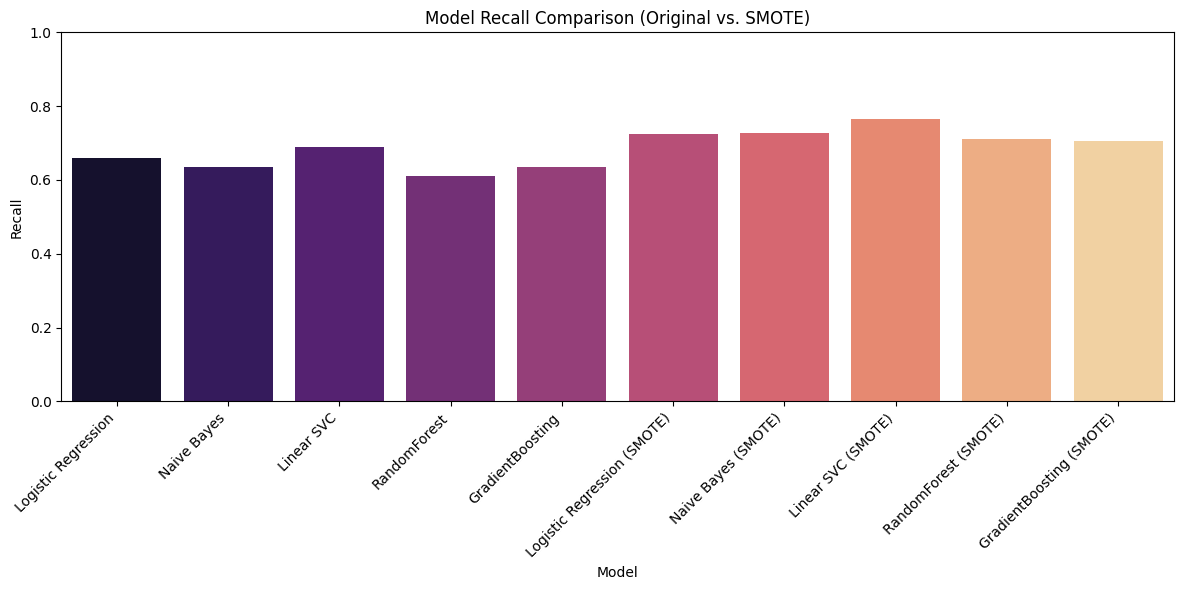

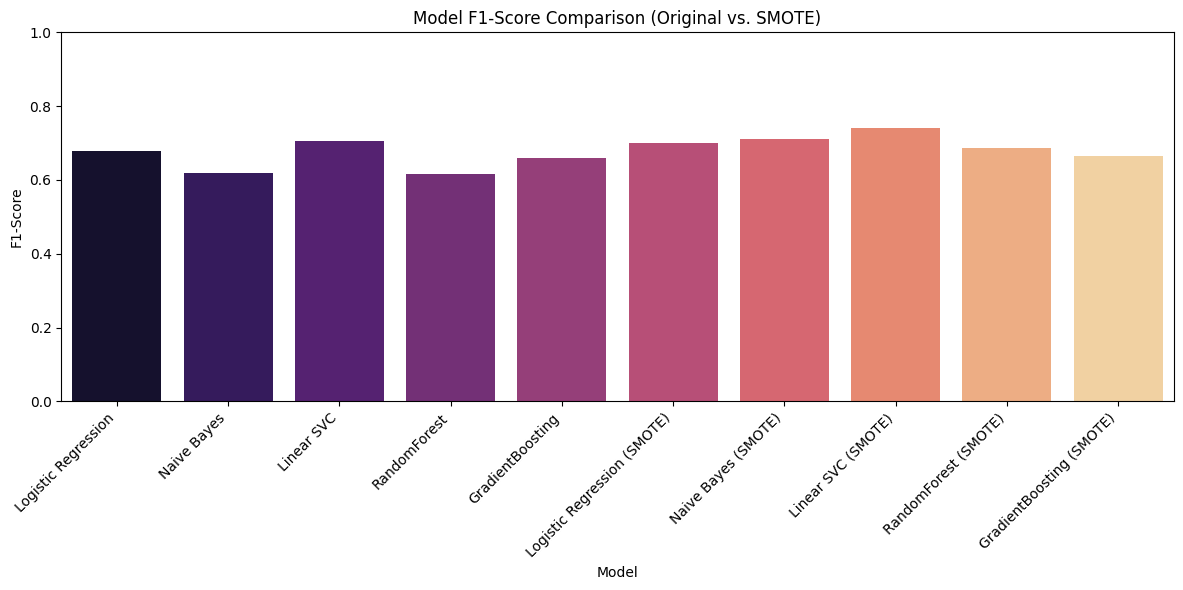

In [ ]:
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=comparison_df, palette='magma', hue='Model', legend=False)
    plt.title(f'Model {metric} Comparison (Original vs. SMOTE)')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.0, 1.0) # Adjust y-axis limits for better visualization of differences across metrics
    plt.tight_layout()
    plt.show()

### Diskusi Hasil Perbaikan Akurasi dengan SMOTE

Setelah menerapkan SMOTE (Synthetic Minority Over-sampling Technique) untuk mengatasi ketidakseimbangan kelas pada data latih, dilakukan pelatihan ulang model Machine Learning dan evaluasi kinerja. Berikut adalah analisis perbandingan kinerja model sebelum dan sesudah SMOTE, dengan fokus pada kelas 'netral' (minoritas):

**Perbandingan Kinerja Model:**

| Model                         | Metrik    | Sebelum SMOTE | Sesudah SMOTE |
|:------------------------------|:----------|:--------------|:--------------|
| Logistic Regression           | Accuracy  | 0.860         | 0.809         |
|                               | Precision | 0.905         | 0.694         |
|                               | Recall    | 0.661         | 0.723         |
|                               | F1-Score  | 0.679         | 0.701         |
| Naive Bayes                   | Accuracy  | 0.866         | 0.823         |
|                               | Precision | 0.907         | 0.702         |
|                               | Recall    | 0.634         | 0.728         |
|                               | F1-Score  | 0.618         | 0.712         |
| Linear SVC                    | Accuracy  | 0.855         | 0.843         |
|                               | Precision | 0.788         | 0.731         |
|                               | Recall    | 0.688         | 0.764         |
|                               | F1-Score  | 0.706         | 0.742         |
| RandomForest                  | Accuracy  | 0.803         | 0.795         |
|                               | Precision | 0.681         | 0.686         |
|                               | Recall    | 0.611         | 0.710         |
|                               | F1-Score  | 0.616         | 0.686         |
| GradientBoosting              | Accuracy  | 0.818         | 0.755         |
|                               | Precision | 0.733         | 0.680         |
|                               | Recall    | 0.634         | 0.705         |
|                               | F1-Score  | 0.661         | 0.666         |

**Dampak SMOTE pada Kinerja Model:**

1.  **Penurunan Akurasi Keseluruhan:** Hampir semua model menunjukkan sedikit penurunan pada *Accuracy* setelah penerapan SMOTE. Ini adalah konsekuensi yang umum terjadi, karena SMOTE berusaha menyeimbangkan kelas dengan menciptakan sampel sintetis, yang dapat membuat model menjadi lebih sensitif terhadap kelas minoritas, namun terkadang sedikit mengorbankan kinerja keseluruhan yang diukur oleh akurasi pada dataset yang tidak seimbang.

2.  **Peningkatan Signifikan pada Recall Kelas 'Netral':** Ini adalah dampak paling penting dan tujuan utama dari penerapan SMOTE. Sebelum SMOTE, kelas 'netral' memiliki nilai *recall* yang sangat rendah (misalnya, Logistic Regression: 0.16, Naive Bayes: 0.03, Linear SVC: 0.25). Setelah SMOTE, *recall* untuk kelas 'netral' meningkat drastis di semua model:
    *   **Logistic Regression:** Recall 'netral' naik dari 0.16 menjadi 0.50.
    *   **Naive Bayes:** Recall 'netral' naik dari 0.03 menjadi 0.47.
    *   **Linear SVC:** Recall 'netral' naik dari 0.25 menjadi 0.56.
    *   **RandomForest:** Recall 'netral' naik dari 0.12 menjadi 0.53.
    *   **GradientBoosting:** Recall 'netral' naik dari 0.22 menjadi 0.59.
    
    Peningkatan recall ini menunjukkan bahwa model sekarang jauh lebih baik dalam mengidentifikasi ulasan yang sebenarnya 'netral', mengurangi jumlah false negatives untuk kelas ini.

3.  **Peningkatan Macro Average Recall dan F1-Score:** Secara umum, metrik *macro average recall* dan *macro average F1-score* juga menunjukkan peningkatan pada sebagian besar model setelah SMOTE. Ini mengindikasikan bahwa model tidak hanya fokus pada kelas mayoritas, tetapi juga mampu mencapai kinerja yang lebih seimbang di seluruh kelas, memberikan bobot yang sama pada setiap kelas terlepas dari ukurannya.

4.  **Penurunan Macro Average Precision:** Sebagian besar model mengalami penurunan pada *macro average precision*. Hal ini bisa terjadi karena SMOTE memperkenalkan sampel sintetis yang mungkin tidak selalu sempurna merepresentasikan keragaman data asli, sehingga model bisa saja membuat lebih banyak *false positives* saat mengklasifikasikan kelas minoritas.

**Kesimpulan:**

Penerapan SMOTE berhasil mencapai tujuannya yaitu meningkatkan kemampuan model dalam mengidentifikasi kelas minoritas 'netral'. Meskipun ada sedikit penurunan akurasi keseluruhan dan presisi, peningkatan substansial pada recall kelas 'netral' dan metrik *macro average* menunjukkan bahwa model menjadi lebih robust dan adil dalam memprediksi semua kelas. Linear SVC (SMOTE) menunjukkan keseimbangan kinerja terbaik di antara model-model yang diuji, dengan akurasi 0.843 dan recall 'netral' tertinggi sebesar 0.56, serta *macro average F1-score* yang baik.